In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyproj
import datetime
from statistics import mode
from geopy.geocoders import Nominatim

# EDA - Exploratory Data Analysis on Milan listings

## LISTING VARIABLE

In the following script the variable that are more recurrent in literature are analysed.  
In particular, some exploratory data analysis are performed on the variable *price*, *room_type*, *neighbourhood* and *location*.

In [2]:
#import listing data
list_jan = pd.read_csv('milano_2019/listings.csv') 
list_feb = pd.read_csv('milano_2019/listings-2.csv')
list_mar = pd.read_csv('milano_2019/listings-3.csv')
list_apr = pd.read_csv('milano_2019/listings-4.csv')
list_may = pd.read_csv('milano_2019/listings-5.csv')
list_jun = pd.read_csv('milano_2019/listings-6.csv')
list_jul = pd.read_csv('milano_2019/listings-7.csv')
list_aug = pd.read_csv('milano_2019/listings-8.csv')
list_sep = pd.read_csv('milano_2019/listings-9.csv')
list_oct = pd.read_csv('milano_2019/listings-10.csv')
list_nov = pd.read_csv('milano_2019/listings-11.csv')
list_dec = pd.read_csv('milano_2019/listings-12.csv')

In [3]:
list_jan['last_update'] = '2019-01-16'
list_feb['last_update'] = '2019-02-07'
list_mar['last_update'] = '2019-03-08'
list_apr['last_update'] = '2019-04-11'
list_may['last_update'] = '2019-05-14'
list_jun['last_update'] = '2019-06-08'
list_jul['last_update'] = '2019-07-12'
list_aug['last_update'] = '2019-08-12'
list_sep['last_update'] = '2019-09-20'
list_oct['last_update'] = '2019-10-16'
list_nov['last_update'] = '2019-11-16'
list_dec['last_update'] = '2019-12-11'

In [4]:
data_frames = [list_jan, list_feb, list_mar, list_apr, list_may, list_jun, list_jul,
              list_aug, list_sep, list_oct, list_nov, list_dec]


df_merged = pd.concat(data_frames)

In [5]:
df_merged.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   
3                  NaN   VIALE MONZA  45.519876   9.223101  Entire home/apt   
4                  NaN   VIALE MONZA  45.519422   9.226154  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.15   
2    200               1                  8  2015-10-25               0.10   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.27   

   calculated_host_listings_count  availability_365 last_update  
0                               1               358  2019-01-16  
1                               1               358  2019-01-16  
2                               1               365  2019-01-16  
3                               5               247  2019-01-16  
4                               5               316  2019-01-16

In [6]:
len(df_merged)

237484

In [7]:
# some listing change 

room = df_merged.groupby('id').agg(modal_room_type = ('room_type', 
                                                   lambda x:x.value_counts().index[0])).reset_index()

In [8]:
room.modal_room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [9]:
df_merged = df_merged.merge(room, how='left', on=['id'])

In [10]:
list_room = df_merged.drop_duplicates(['id'])
list_room.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   
3                  NaN   VIALE MONZA  45.519876   9.223101  Entire home/apt   
4                  NaN   VIALE MONZA  45.519422   9.226154  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.15   
2    200               1                  8  2015-10-25               0.10   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.27   

   calculated_host_listings_count  availability_365 last_update  \
0                               1               358  2019-01-16   
1                               1               358  2019-01-16   
2                               1               365  2019-01-16   
3                               5               247  2019-01-16   
4                               5               316  2019-01-16   

   modal_room_type  
0     Private room  
1  Entire home/apt  
2     Private room  
3  Entire home/apt  
4  Entire home/apt

In [11]:
# check for lst update:
list_room.last_update.unique()

# as mentioned, listing are added in the dataset each different month

array(['2019-01-16', '2019-02-07', '2019-03-08', '2019-04-11',
       '2019-05-14', '2019-06-08', '2019-07-12', '2019-08-12',
       '2019-09-20', '2019-10-16', '2019-11-16', '2019-12-11'],
      dtype=object)

In [12]:
# the final dataset has a single row for listing
len(list_room), len(list_room.id.unique())

(28255, 28255)

In [13]:
list_room.modal_room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [14]:
list_room.groupby('modal_room_type').count()

id   name  host_id  host_name  neighbourhood_group  \
modal_room_type                                                          
Entire home/apt  20628  20616    20628      20627                    0   
Hotel room          24     24       24         24                    0   
Private room      6990   6986     6990       6987                    0   
Shared room        613    612      613        613                    0   

                 neighbourhood  latitude  longitude  room_type  price  \
modal_room_type                                                         
Entire home/apt          20628     20628      20628      20628  20628   
Hotel room                  24        24         24         24     24   
Private room              6990      6990       6990       6990   6990   
Shared room                613       613        613        613    613   

                 minimum_nights  number_of_reviews  last_review  \
modal_room_type                                                   
Entire home/apt           20628              20628        12373   
Hotel room                   24                 24            0   
Private room               6990               6990         4258   
Shared room                 613                613          338   

                 reviews_per_month  calculated_host_listings_count  \
modal_room_type                                                      
Entire home/apt              12373                           20628   
Hotel room                       0                              24   
Private room                  4258                            6990   
Shared room                    338                             613   

                 availability_365  last_update  
modal_room_type                                 
Entire home/apt             20628        20628  
Hotel room                     24           24  
Private room                 6990         6990  
Shared room                   613          613

### Type of listing

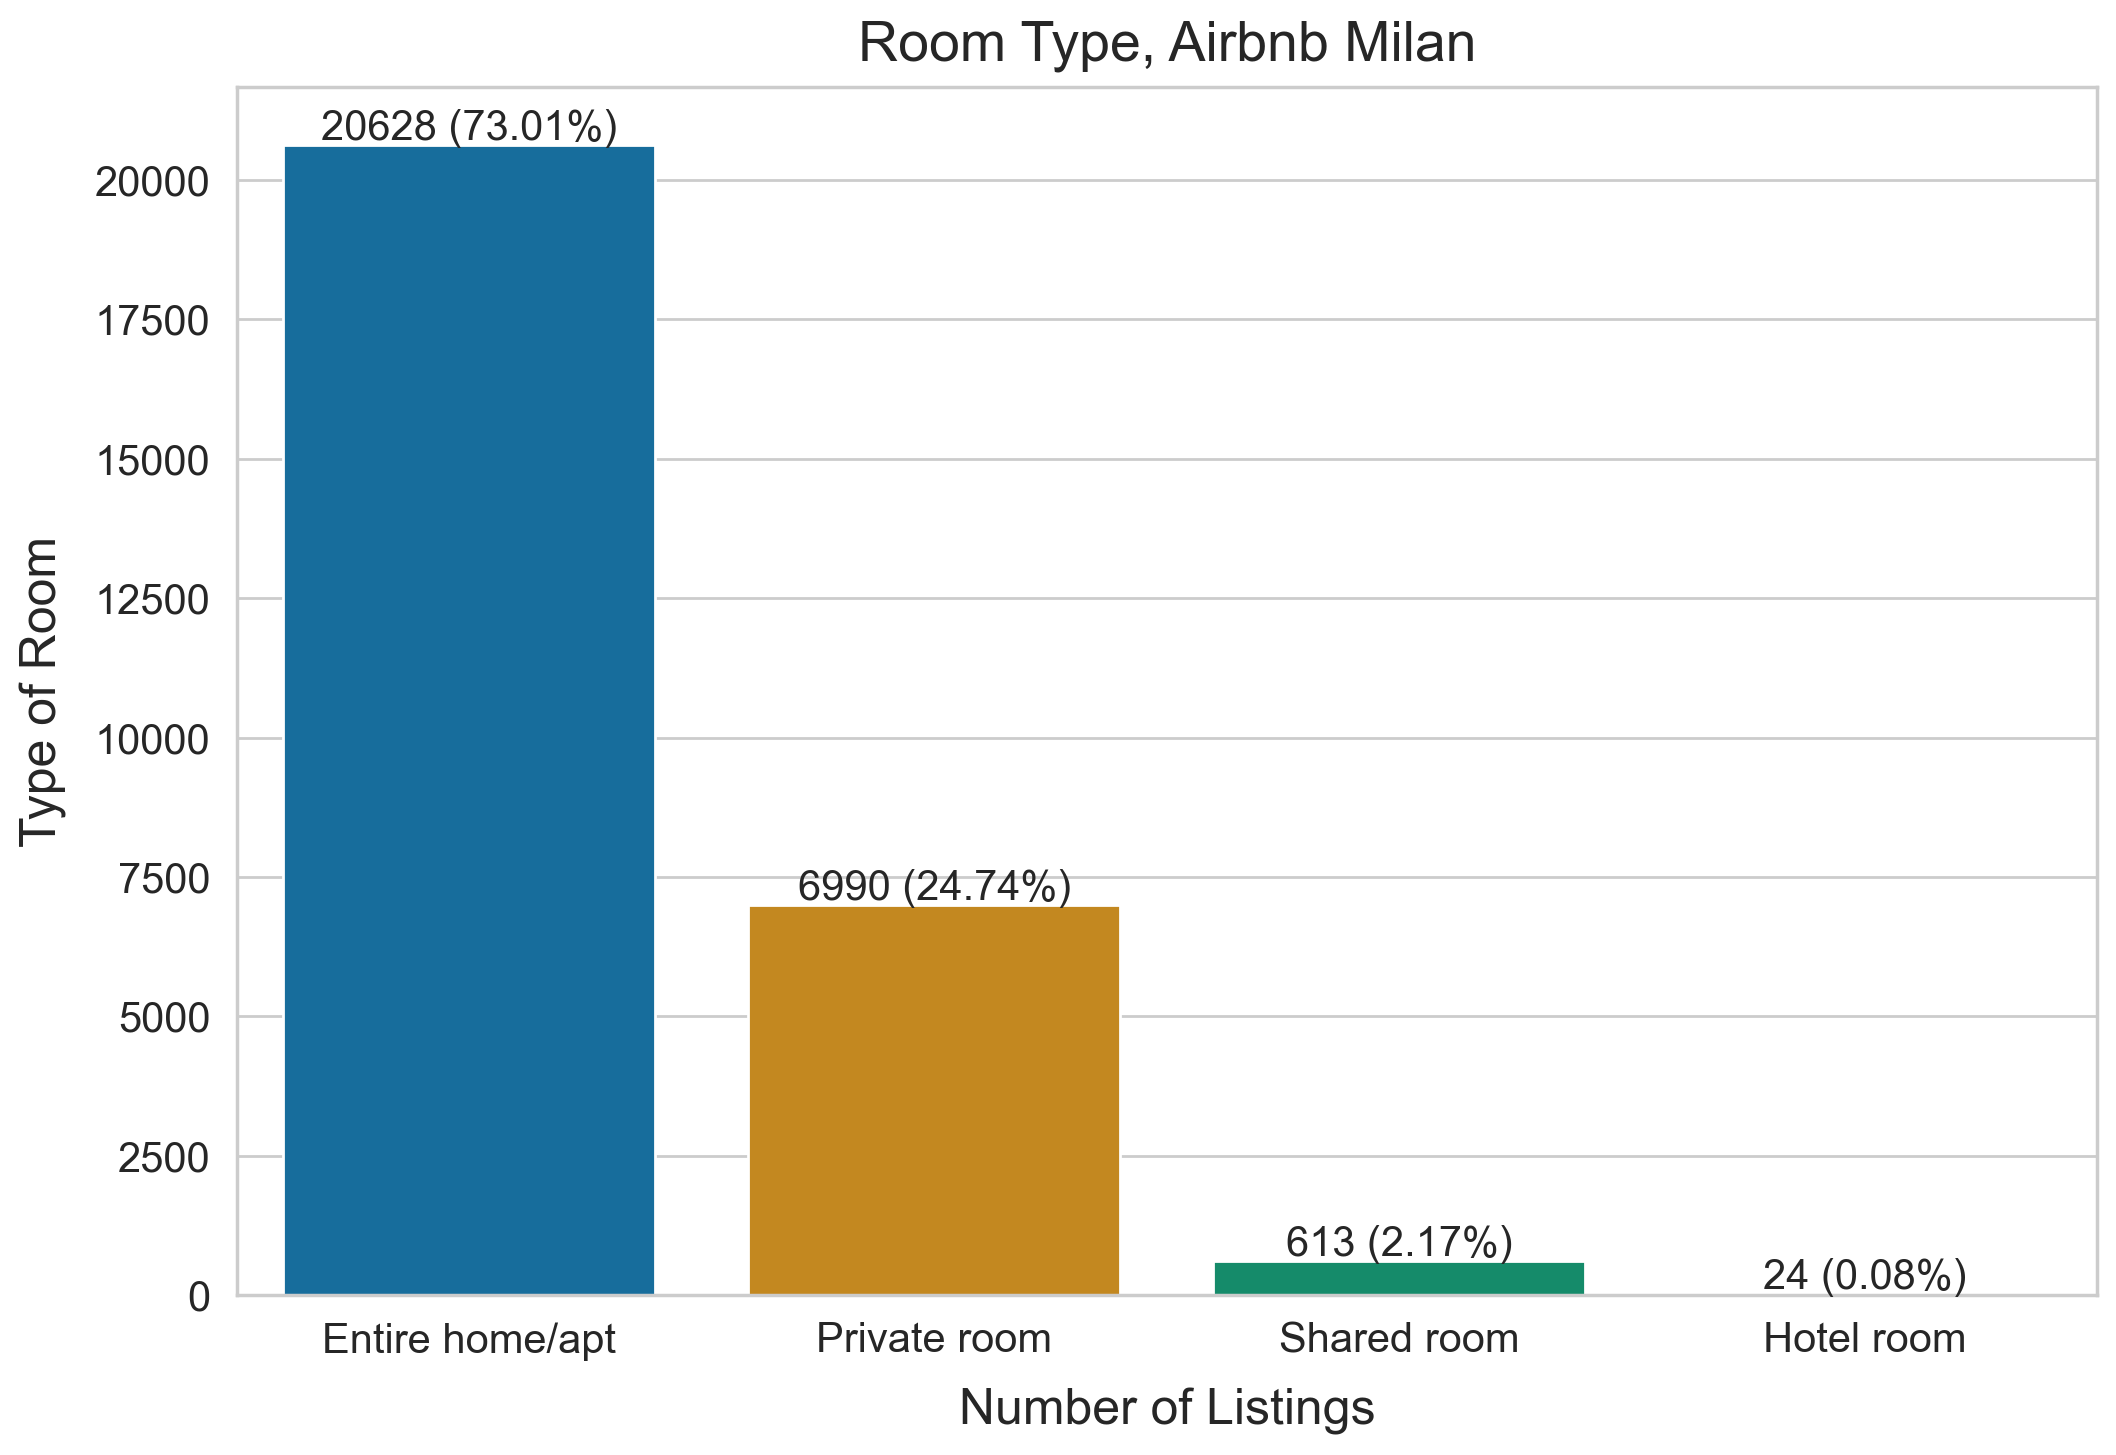

In [15]:
# Plot the room types

list_room = df_merged.drop_duplicates(['id'])
sns.set(style="whitegrid")

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
fig.set_dpi(200)
p = sns.color_palette("colorblind", 3)

ax.axes.set_title("Room Type, Airbnb Milan",fontsize=20, pad=10)
ax = sns.countplot(x='modal_room_type',data=list_room,
                   order=list_room['modal_room_type'].value_counts().index, palette=p)

ax.set_xlabel('Number of Listings',fontsize=18,labelpad=10)
ax.set_ylabel('Type of Room',fontsize=18,labelpad=10)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
# ax.annotate('Source: Airbnb - Get data', xy= (1, 0.05), xycoords='figure fraction', 
# horizontalalignment='center', verticalalignment='top', fontsize=8, color='#555555')


total = float(len(list_room))
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    text = str(p.get_height()) + ' (' + percentage + ')'
    ax.annotate(text, (p.get_x()+0.4, p.get_height()+100), ha='center', size = 15)

    
#plt.savefig('room_type.png')

### Location of listing

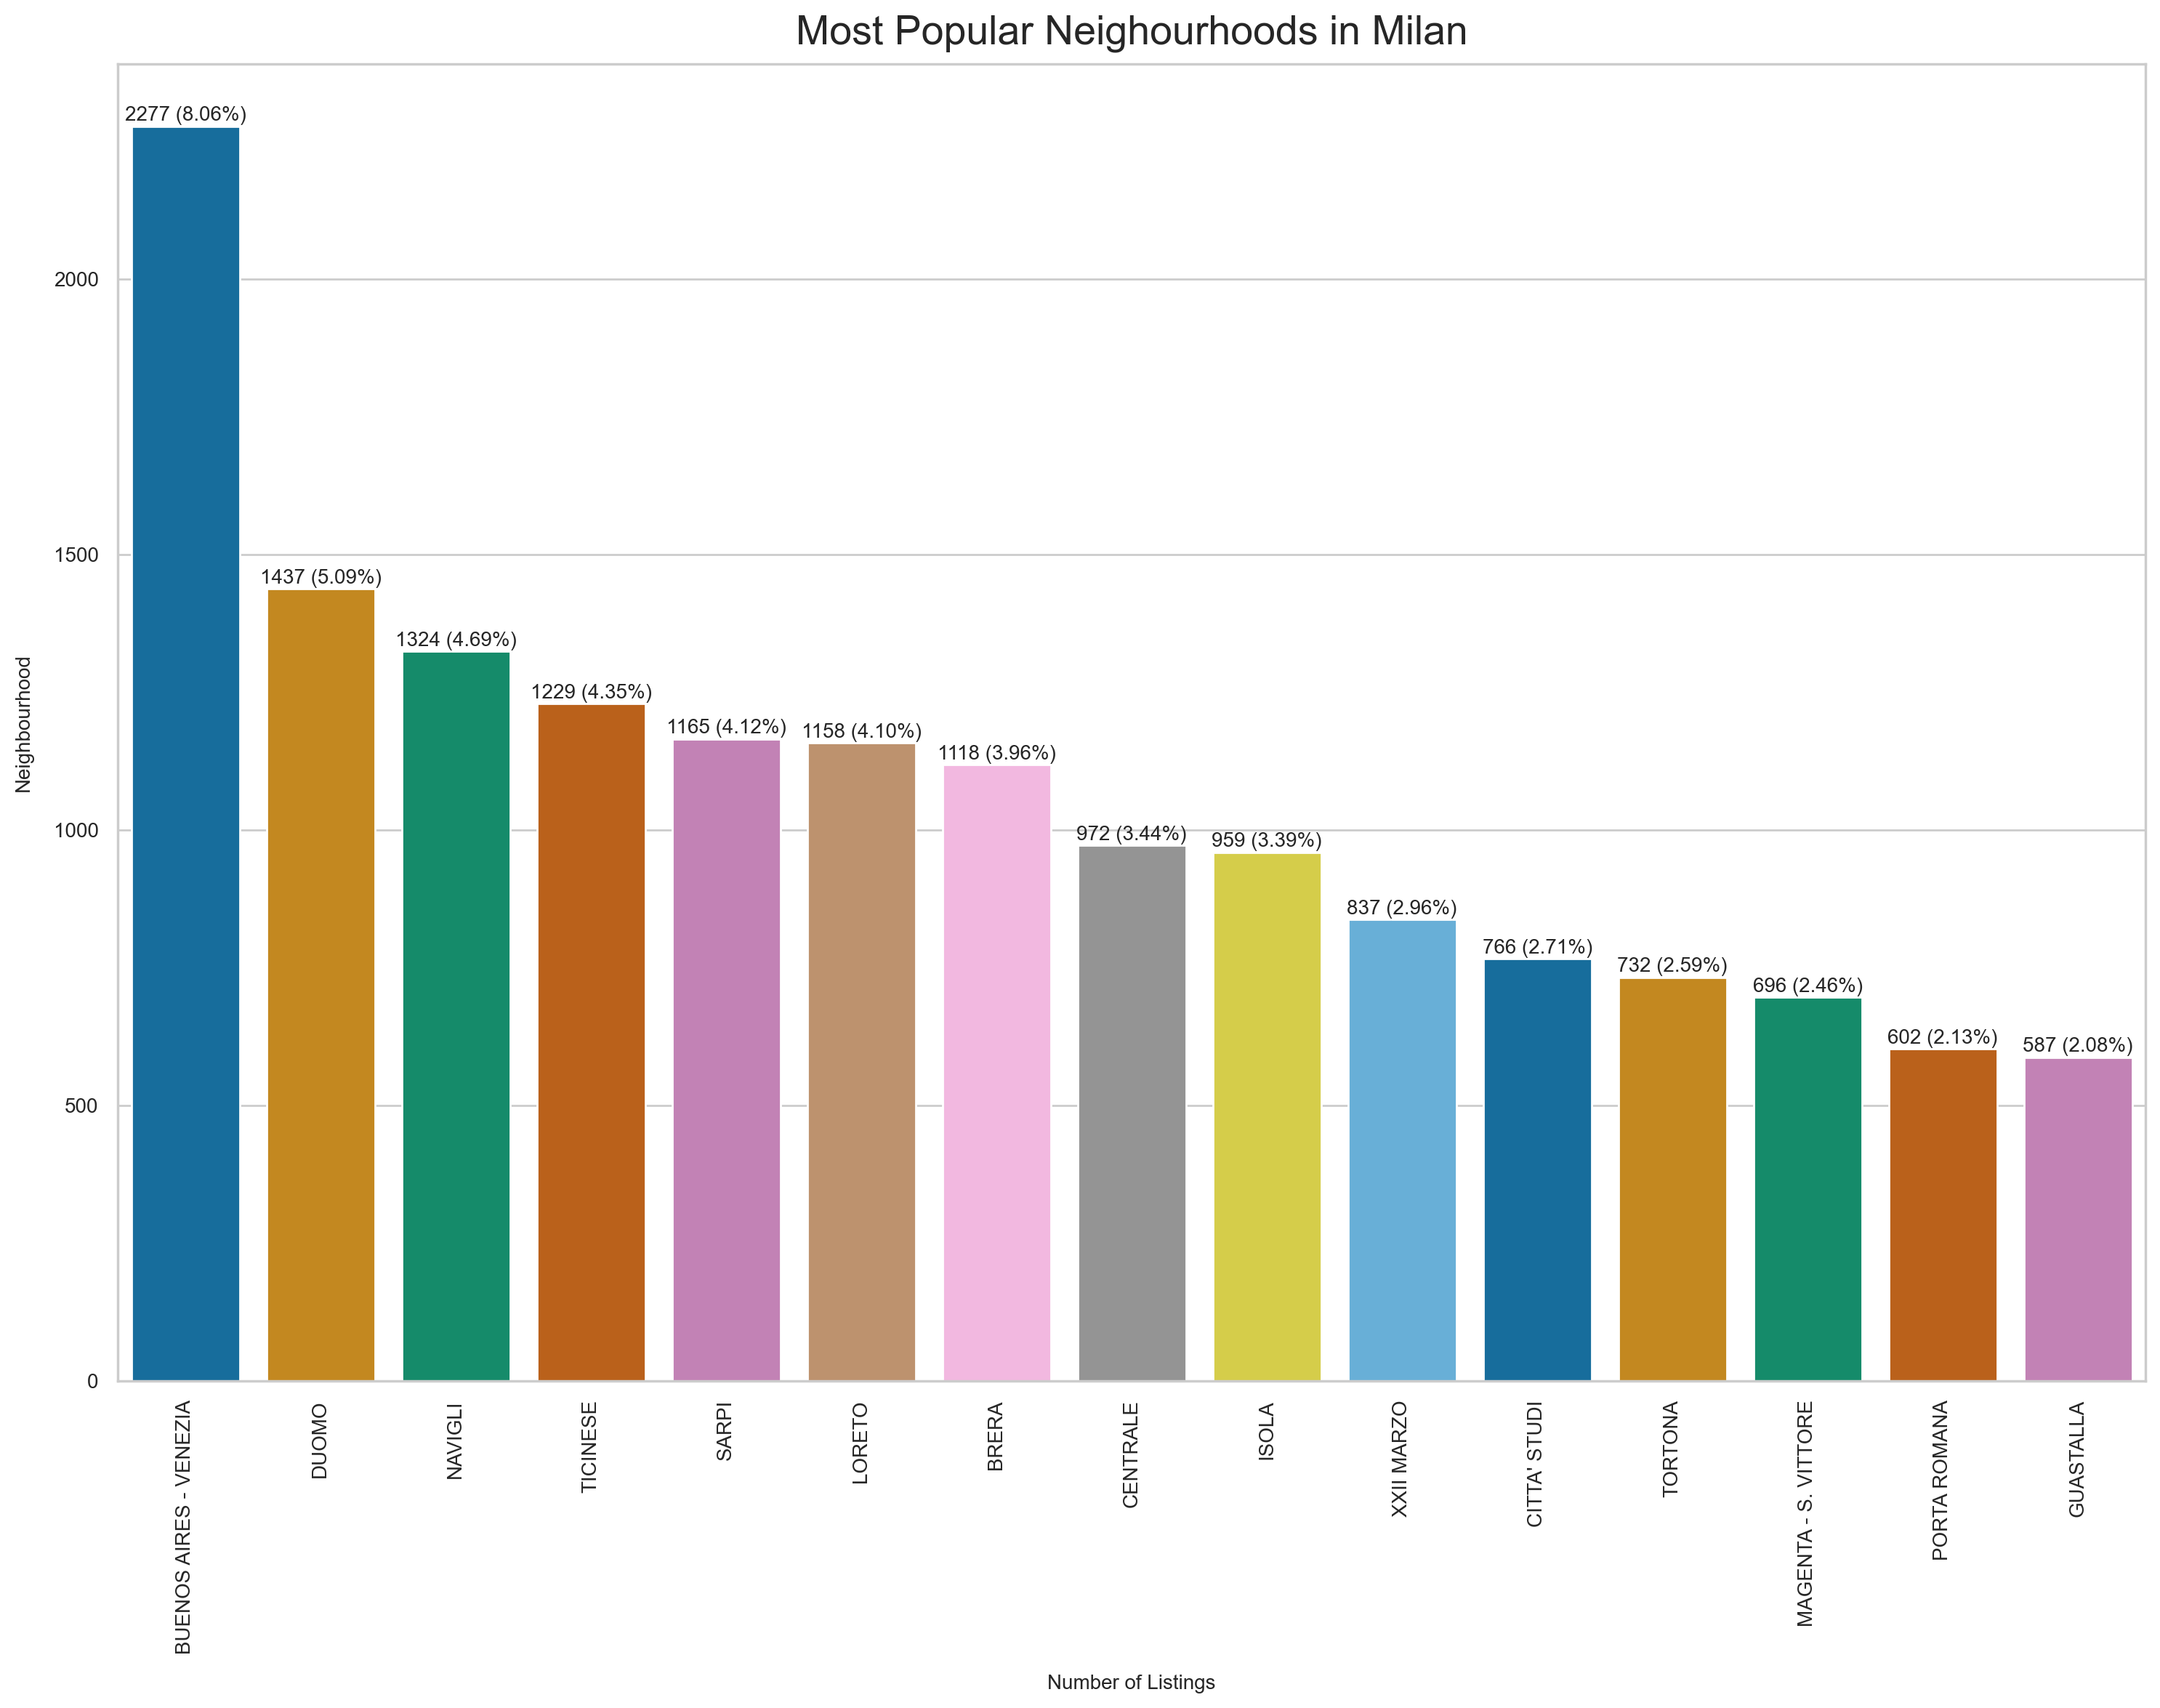

In [16]:
# Plot top 15 neighbourhoods in terms of listings

sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(18, 12)
fig.set_dpi(200)
p = sns.color_palette("colorblind", 15)

ax.axes.set_title("Most Popular Neighourhoods in Milan",fontsize=20,pad=10)
ax = sns.countplot(x='neighbourhood',data=list_room, 
                   order = list_room['neighbourhood'].value_counts().iloc[:15].index, palette=p)

ax.set_xlabel('Number of Listings',fontsize=10,labelpad=10)
ax.set_ylabel('Neighbourhood',fontsize=10,labelpad=10)
ax.xaxis.set_tick_params(labelsize=10, rotation=90)
ax.yaxis.set_tick_params(labelsize=10)
# ax.annotate('Source: Airbnb - Get data', xy= (1, 0.05), xycoords='figure fraction', 
# horizontalalignment='center', verticalalignment='top', fontsize=8, color='#555555')


total = float(len(list_room))
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    text = str(p.get_height()) + ' (' + percentage + ')'
    ax.annotate(text, (p.get_x()+0.4, p.get_height()+10), ha='center', size = 10)
    
#plt.savefig('Neighbourhood.png') saved manually in order not to cut the x axis

In [17]:
list_room.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   
3                  NaN   VIALE MONZA  45.519876   9.223101  Entire home/apt   
4                  NaN   VIALE MONZA  45.519422   9.226154  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.15   
2    200               1                  8  2015-10-25               0.10   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.27   

   calculated_host_listings_count  availability_365 last_update  \
0                               1               358  2019-01-16   
1                               1               358  2019-01-16   
2                               1               365  2019-01-16   
3                               5               247  2019-01-16   
4                               5               316  2019-01-16   

   modal_room_type  
0     Private room  
1  Entire home/apt  
2     Private room  
3  Entire home/apt  
4  Entire home/apt

In [18]:
district = list_room['neighbourhood'].value_counts()

In [19]:
district

BUENOS AIRES - VENEZIA    2277
DUOMO                     1437
NAVIGLI                   1324
TICINESE                  1229
SARPI                     1165
                          ... 
CANTALUPA                    5
PARCO AGRICOLO SUD           5
QUINTOSOLE                   4
RONCHETTO DELLE RANE         2
STEPHENSON                   1
Name: neighbourhood, Length: 87, dtype: int64

In [20]:
district = district.to_frame().reset_index()

In [21]:
district.columns

Index(['index', 'neighbourhood'], dtype='object')

In [22]:
district.rename(columns={'neighbourhood':'total', 'index':'neighbourhood'}, inplace=True)
district.head()

neighbourhood  total
0  BUENOS AIRES - VENEZIA   2277
1                   DUOMO   1437
2                 NAVIGLI   1324
3                TICINESE   1229
4                   SARPI   1165

In [23]:
# upload the geojson file for plotting the city of Milan
fname = "neighbourhoods.geojson"
city = gpd.read_file(fname)

In [24]:
city_milan = city.merge(district, how='left', on='neighbourhood')

In [25]:
city_milan

neighbourhood neighbourhood_group  \
0                  SACCO                None   
1               COMASINA                None   
2             STEPHENSON                None   
3                   QT 8                None   
4            ORTOMERCATO                None   
..                   ...                 ...   
83  PARCO BOSCO IN CITT
                None   
84          PORTA ROMANA                None   
85     PARCO DEI NAVIGLI                None   
86                PAGANO                None   
87  GARIBALDI REPUBBLICA                None   

                                             geometry  total  
0   MULTIPOLYGON (((9.12195 45.51602, 9.12163 45.5...   15.0  
1   MULTIPOLYGON (((9.16887 45.52396, 9.16803 45.5...   53.0  
2   MULTIPOLYGON (((9.12932 45.50998, 9.12973 45.5...    1.0  
3   MULTIPOLYGON (((9.14368 45.48474, 9.14338 45.4...   50.0  
4   MULTIPOLYGON (((9.23739 45.45588, 9.23731 45.4...   44.0  
..                                                ...    ...  
83  MULTIPOLYGON (((9.09998 45.48789, 9.10146 45.4...   15.0  
84  MULTIPOLYGON (((9.21002 45.44739, 9.21018 45.4...  602.0  
85  MULTIPOLYGON (((9.15266 45.41520, 9.15200 45.4...   14.0  
86  MULTIPOLYGON (((9.16506 45.46684, 9.16486 45.4...  300.0  
87  MULTIPOLYGON (((9.19871 45.48484, 9.19836 45.4...  439.0  

[88 rows x 4 columns]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


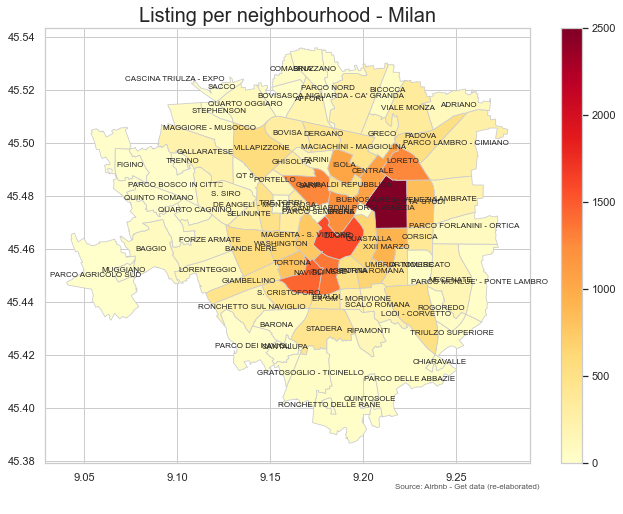

In [50]:
# heat map of Milan according to number of listing per district

vmin, vmax = 0, 2500
fig, ax = plt.subplots(1, figsize=(11, 8))

city_milan.plot(column=city_milan['total'], cmap= 'YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# add a title
ax.set_title('Listing per neighbourhood - Milan', fontdict={'fontsize': 20, 'fontweight' : 3})
# create an annotation for the data source
ax.annotate('Source: Airbnb - Get data (re-elaborated)', xy= (0.75, .06), xycoords='figure fraction', 
            horizontalalignment='center', verticalalignment='top', fontsize=8, color='#555555')

            
        
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
#sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

city_milan['coords'] = city_milan['geometry'].apply(lambda x: x.representative_point().coords[:])
city_milan['coords'] = [coords[0] for coords in city_milan['coords']]

for idx, row in city_milan.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['coords'], horizontalalignment='center', size=8)
    
fig.savefig("listing_milan2.png", dpi=150)

In [27]:
list_room.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   
3                  NaN   VIALE MONZA  45.519876   9.223101  Entire home/apt   
4                  NaN   VIALE MONZA  45.519422   9.226154  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.15   
2    200               1                  8  2015-10-25               0.10   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.27   

   calculated_host_listings_count  availability_365 last_update  \
0                               1               358  2019-01-16   
1                               1               358  2019-01-16   
2                               1               365  2019-01-16   
3                               5               247  2019-01-16   
4                               5               316  2019-01-16   

   modal_room_type  
0     Private room  
1  Entire home/apt  
2     Private room  
3  Entire home/apt  
4  Entire home/apt

In [28]:
list_room.number_of_reviews.max()

718

In [29]:
gdf = list_room.iloc[:, [0,1,6,7,17]]
gdf = gpd.GeoDataFrame(
    gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))

In [30]:
gdf.head()

id                                name   latitude  longitude  \
0   6400                    The Studio Milan  45.441950   9.177974   
1  23986     " Characteristic Milanese flat"  45.449906   9.175971   
2  28300             nice flat near the park  45.478141   9.172939   
3  32119  Nico & Cynthia's Easy Yellow Suite  45.519876   9.223101   
4  32649       Nico&Cinzia's Red Easy Suite!  45.519422   9.226154   

   modal_room_type                  geometry  
0     Private room  POINT (9.17797 45.44195)  
1  Entire home/apt  POINT (9.17597 45.44991)  
2     Private room  POINT (9.17294 45.47814)  
3  Entire home/apt  POINT (9.22310 45.51988)  
4  Entire home/apt  POINT (9.22615 45.51942)

In [31]:
gdf.modal_room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [32]:
# scatter

# sources: https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html
#          https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/
# plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/


fig, ax = plt.subplots(1, figsize=(11, 8))

city_milan.plot(ax = ax, color='whitesmoke', edgecolor='grey')

room_palette = {'Private room':'limegreen', 'Entire home/apt':'gold', 
                'Shared room':'red', 'Hotel room': 'blueviolet'}            

for room, data in gdf.groupby('modal_room_type'):
    color = room_palette[room]
    label = room
    data.plot(color=color,
              ax=ax,
              label=label,
              markersize=20,
              #alpha=0.5,
              edgecolors='k')
    
ax.legend(fontsize=10,
          frameon=True,
          loc=(0.001,0.001),
          title="LEGEND")



ax.set_title('Airbnb listings in Milan', fontdict={'fontsize': 15, 'fontweight' : 3})

#ax.annotate('Source: Airbnb - Get data (re-elaborated)', xy= (0.8, .08), xycoords='figure fraction', 
#            horizontalalignment='center', verticalalignment='top', fontsize=10, color='#555555')


fig.savefig("scatter.png", dpi=150)

plt.show()

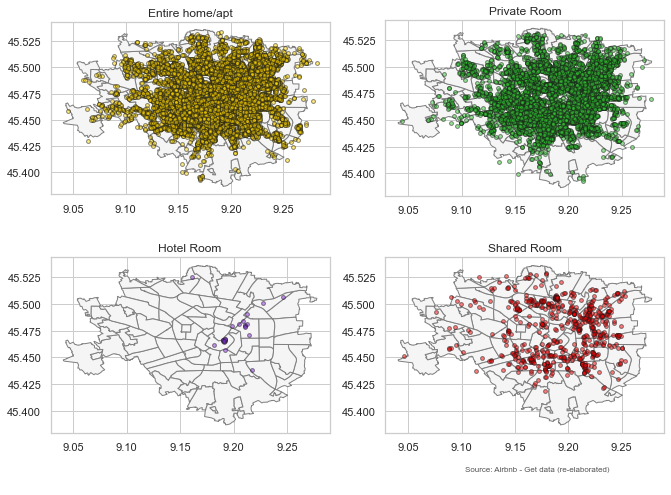

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(11, 8))

axes[0, 0].set_title('Entire home/apt')
city_milan.plot(ax = axes[0, 0], color='whitesmoke', edgecolor='grey')
gdf[gdf['modal_room_type'] == 'Entire home/apt'].plot(ax = axes[0, 0], 
                                                color='gold', 
                                                markersize=15, 
                                                alpha=0.5,
                                                edgecolors='k')

axes[0,1].set_title('Private Room')
city_milan.plot(ax = axes[0, 1], color='whitesmoke', edgecolor='grey')
gdf[gdf['modal_room_type'] == 'Private room'].plot(ax = axes[0, 1], 
                                             color='limegreen', 
                                             markersize=15,
                                             alpha=0.5,
                                             edgecolors='k')

axes[1, 0].set_title('Hotel Room')
city_milan.plot(ax = axes[1,0], color='whitesmoke', edgecolor='grey')
gdf[gdf['modal_room_type'] == 'Hotel room'].plot(ax = axes[1,0], 
                                            color='blueviolet', 
                                            markersize=15,
                                            alpha=0.5,

                                                 edgecolors='k')

axes[1, 1].set_title('Shared Room')
city_milan.plot(ax = axes[1, 1], color='whitesmoke', edgecolor='grey')
gdf[gdf['modal_room_type'] == 'Shared room'].plot(ax = axes[1,1], 
                                            color='red', 
                                            markersize=15,
                                            alpha=0.5,
                                            edgecolors='k')

axes[1,1].annotate('Source: Airbnb - Get data (re-elaborated)', xy= (0.8, .06), xycoords='figure fraction', horizontalalignment='center', verticalalignment='top', fontsize=8, color='#555555')

fig.savefig("scatter_piccoli2.png", dpi=200)


plt.show()

In [35]:
# price distribution

# barplot for price in the city

In [36]:
df_merged.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   
3                  NaN   VIALE MONZA  45.519876   9.223101  Entire home/apt   
4                  NaN   VIALE MONZA  45.519422   9.226154  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.15   
2    200               1                  8  2015-10-25               0.10   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.27   

   calculated_host_listings_count  availability_365 last_update  \
0                               1               358  2019-01-16   
1                               1               358  2019-01-16   
2                               1               365  2019-01-16   
3                               5               247  2019-01-16   
4                               5               316  2019-01-16   

   modal_room_type  
0     Private room  
1  Entire home/apt  
2     Private room  
3  Entire home/apt  
4  Entire home/apt

In [37]:
price = df_merged.groupby('id').agg(modal_price = ('price', 
                                                   lambda x:x.value_counts().index[0])).reset_index()
price_df = df_merged.merge(price, how='left', on=['id'])

In [38]:
price.head()

id  modal_price
0   6400          100
1  18429          150
2  23986          150
3  28300          200
4  32119           75

In [39]:
avg_price = price.modal_price.mean()
round(avg_price)

115

In [40]:
len(price) == len(df_merged.id.unique())

True

In [41]:
# average price in each neighbourhood

quartieri = price_df.groupby('neighbourhood').agg(avg = ('modal_price', 'mean')).reset_index()
quartieri_sort = quartieri.sort_values(by = 'avg', ascending = False).head(15)

In [42]:
# plot the 15 most expensive district in Milan with their price

sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(18, 12)
fig.set_dpi(200)
p = sns.color_palette("colorblind", 15)

ax.axes.set_title("Most expensive neighbourhood in Milan",fontsize=20,pad=10)
ax = sns.barplot(x="neighbourhood", y="avg", data=quartieri_sort, palette = p)

ax.set_xlabel('Price (euro)',fontsize=10,labelpad=10)
ax.set_ylabel('Neighbourhood',fontsize=10,labelpad=10)
ax.xaxis.set_tick_params(labelsize=10, rotation=90)
ax.yaxis.set_tick_params(labelsize=10)
# ax.annotate('Source: Airbnb - Get data', xy= (1, 0.05), xycoords='figure fraction', 
# horizontalalignment='center', verticalalignment='top', fontsize=8, color='#555555')

# Go to the next section for media_noout
media_noout = 102.858
plt.annotate(s="Average price in the city (removing the effect of outliers)", 
             xy=(-0.2, 95), 
             bbox=dict(boxstyle="round",alpha=0.75,facecolor = "white",edgecolor = "grey"),)
ax.axhline(y=round(media_noout), linestyle = '--', color = 'black')


plt.annotate(s="Average price in the city", 
             xy=(-0.2, 120), 
             bbox=dict(boxstyle="round",alpha=0.75,facecolor = "white",edgecolor = "grey"),)
ax.axhline(y=round(avg_price), linestyle = '--', color = 'black')


for p in ax.patches:
    text = str(round(p.get_height())) + '€'
    ax.annotate(text, (p.get_x()+0.4, p.get_height()+1), ha='center', size = 10)
    
#plt.savefig('price.png')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


In [43]:
city_milan = city_milan.merge(quartieri, how='left', on='neighbourhood')
city_milan.sort_values(by = 'avg', ascending = False).head(15)

neighbourhood neighbourhood_group  \
56  GIARDINI PORTA VENEZIA                None   
36                   DUOMO                None   
35                   BRERA                None   
55          PARCO SEMPIONE                None   
34               GUASTALLA                None   
87    GARIBALDI REPUBBLICA                None   
38    MAGENTA - S. VITTORE                None   
47           QUINTO ROMANO                None   
86                  PAGANO                None   
81                TICINESE                None   
75                   SARPI                None   
58                 NAVIGLI                None   
8                  S. SIRO                None   
49               TRE TORRI                None   
69                CENTRALE                None   

                                             geometry   total  \
56  MULTIPOLYGON (((9.20305 45.47555, 9.20407 45.4...    10.0   
36  MULTIPOLYGON (((9.18125 45.46903, 9.18211 45.4...  1437.0   
35  MULTIPOLYGON (((9.19768 45.47654, 9.19701 45.4...  1118.0   
55  MULTIPOLYGON (((9.18143 45.47632, 9.18158 45.4...    48.0   
34  MULTIPOLYGON (((9.20658 45.47194, 9.20658 45.4...   587.0   
87  MULTIPOLYGON (((9.19871 45.48484, 9.19836 45.4...   439.0   
38  MULTIPOLYGON (((9.17785 45.46799, 9.17747 45.4...   696.0   
47  MULTIPOLYGON (((9.08375 45.48485, 9.08444 45.4...    17.0   
86  MULTIPOLYGON (((9.16506 45.46684, 9.16486 45.4...   300.0   
81  MULTIPOLYGON (((9.18675 45.45235, 9.18659 45.4...  1229.0   
75  MULTIPOLYGON (((9.18183 45.48201, 9.18241 45.4...  1165.0   
58  MULTIPOLYGON (((9.17134 45.45586, 9.17173 45.4...  1324.0   
8   MULTIPOLYGON (((9.14179 45.47839, 9.14068 45.4...   136.0   
49  MULTIPOLYGON (((9.15989 45.47425, 9.15982 45.4...    46.0   
69  MULTIPOLYGON (((9.21488 45.49482, 9.21324 45.4...   972.0   

                                     coords         avg  
56          (9.200749318965514, 45.4747265)  291.780000  
36           (9.187260107245214, 45.464354)  213.139722  
35           (9.188407663793102, 45.473479)  192.069117  
55           (9.175763253715498, 45.473479)  164.196765  
34           (9.203173270663957, 45.463297)  161.410934  
87            (9.18993288250195, 45.483527)  155.992214  
38           (9.169664726399095, 45.464689)  148.723069  
47           (9.09033425266021, 45.4787345)  129.344156  
86            (9.16528274440401, 45.474528)  124.476770  
81  (9.181950764079149, 45.450596000000004)  121.163420  
75           (9.172131793099581, 45.483042)  120.128502  
58           (9.170896749238965, 45.450176)  119.559380  
8            (9.126065140151514, 45.479988)  118.380531  
49            (9.155749305475677, 45.47679)  117.346890  
69  (9.205486124368232, 45.488620499999996)  117.290087

In [44]:
city_milan.avg.min(), city_milan.avg.max()

(38.2, 291.78)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


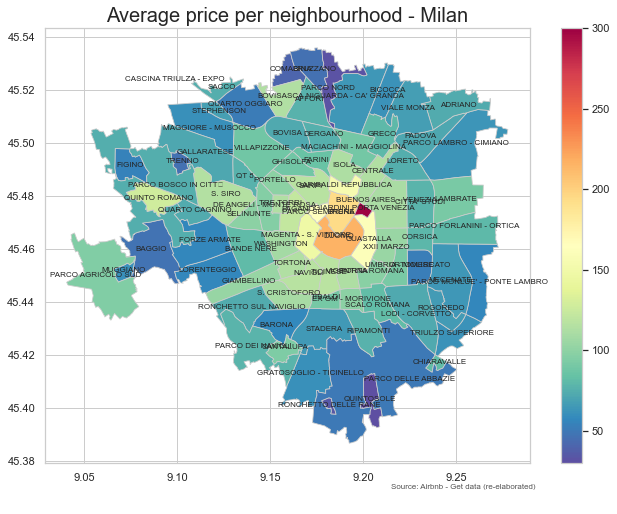

In [49]:
# heat map of Milan according to average price of listing per district

vmin, vmax = 30, 300
fig, ax = plt.subplots(1, figsize=(11, 8))

city_milan.plot(column=city_milan['avg'], cmap= 'Spectral_r', linewidth=0.8, ax=ax, edgecolor='0.8')

# add a title
ax.set_title('Average price per neighbourhood - Milan', fontdict={'fontsize': 20, 'fontweight' : 3})
# create an annotation for the data source
ax.annotate('Source: Airbnb - Get data (re-elaborated)', xy= (0.75, .06), xycoords='figure fraction', 
            horizontalalignment='center', verticalalignment='top', fontsize=8, color='#555555')


        
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
#sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

city_milan['coords'] = city_milan['geometry'].apply(lambda x: x.representative_point().coords[:])
city_milan['coords'] = [coords[0] for coords in city_milan['coords']]

for idx, row in city_milan.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['coords'], horizontalalignment='center', size=8)
    
fig.savefig("avgprice_neighbourhood.png", dpi=150)

In [45]:
# same heat map removing outliers
media, stdeviation = price.modal_price.mean(), price.modal_price.std()

# outlier are here identified as observation that lies three standard deviation
# from the average

# !!! I could have used the interquartile range as well

interval = stdeviation * 3
lower, upper = media - interval, media + interval

In [46]:
price_no_out = price.loc[(price['modal_price'] > lower) & (price['modal_price'] < upper)]

In [47]:
price_no_out.head()

id  modal_price
0   6400          100
1  18429          150
2  23986          150
3  28300          200
4  32119           75

In [48]:
price_no_out.modal_price.min(), price_no_out.modal_price.max()

(0, 750)

In [49]:
price_no_out = df_merged.groupby('id').agg(modal_price = ('price', 
                                                   lambda x:x.value_counts().index[0])).reset_index()
price_df_no_out = df_merged.merge(price_no_out, how='left', on=['id'])

In [50]:
price_df_no_out.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   
3                  NaN   VIALE MONZA  45.519876   9.223101  Entire home/apt   
4                  NaN   VIALE MONZA  45.519422   9.226154  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.15   
2    200               1                  8  2015-10-25               0.10   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.27   

   calculated_host_listings_count  availability_365 last_update  \
0                               1               358  2019-01-16   
1                               1               358  2019-01-16   
2                               1               365  2019-01-16   
3                               5               247  2019-01-16   
4                               5               316  2019-01-16   

   modal_room_type  modal_price  
0     Private room          100  
1  Entire home/apt          150  
2     Private room          200  
3  Entire home/apt           75  
4  Entire home/apt           70

In [51]:
city_milan

neighbourhood neighbourhood_group  \
0                  SACCO                None   
1               COMASINA                None   
2             STEPHENSON                None   
3                   QT 8                None   
4            ORTOMERCATO                None   
..                   ...                 ...   
83  PARCO BOSCO IN CITT
                None   
84          PORTA ROMANA                None   
85     PARCO DEI NAVIGLI                None   
86                PAGANO                None   
87  GARIBALDI REPUBBLICA                None   

                                             geometry  total  \
0   MULTIPOLYGON (((9.12195 45.51602, 9.12163 45.5...   15.0   
1   MULTIPOLYGON (((9.16887 45.52396, 9.16803 45.5...   53.0   
2   MULTIPOLYGON (((9.12932 45.50998, 9.12973 45.5...    1.0   
3   MULTIPOLYGON (((9.14368 45.48474, 9.14338 45.4...   50.0   
4   MULTIPOLYGON (((9.23739 45.45588, 9.23731 45.4...   44.0   
..                                                ...    ...   
83  MULTIPOLYGON (((9.09998 45.48789, 9.10146 45.4...   15.0   
84  MULTIPOLYGON (((9.21002 45.44739, 9.21018 45.4...  602.0   
85  MULTIPOLYGON (((9.15266 45.41520, 9.15200 45.4...   14.0   
86  MULTIPOLYGON (((9.16506 45.46684, 9.16486 45.4...  300.0   
87  MULTIPOLYGON (((9.19871 45.48484, 9.19836 45.4...  439.0   

                                     coords         avg  
0            (9.12389856533024, 45.5203655)   80.577778  
1            (9.161331356869816, 45.527367)   48.898396  
2           (9.122565172139831, 45.5113925)   74.000000  
3             (9.136659460061782, 45.48694)   82.163717  
4            (9.230593005256242, 45.453304)   59.030211  
..                                      ...         ...  
83          (9.099049383164024, 45.4834465)   80.612069  
84  (9.204884701030927, 45.450844000000004)  101.709726  
85  (9.140945646033847, 45.422774000000004)   83.384615  
86            (9.16528274440401, 45.474528)  124.476770  
87            (9.18993288250195, 45.483527)  155.992214  

[88 rows x 6 columns]

In [52]:
# average price in each neighbourhood (no outliers)

quartieri_noout = price_df_no_out.groupby('neighbourhood').agg(avg_noout = ('modal_price', 'mean')).reset_index()
quartieri_sort_noout = quartieri_noout.sort_values(by = 'avg_noout', ascending = False).head(15)

In [53]:
quartieri_noout.head()

neighbourhood  avg_noout
0       ADRIANO  79.543056
1        AFFORI  82.689836
2        BAGGIO  54.842795
3    BANDE NERE  86.042290
4        BARONA  64.022883

In [54]:
city_milan_noout = city_milan.merge(quartieri_noout, how='left', on='neighbourhood')

In [55]:
city_milan_noout.head()

neighbourhood neighbourhood_group  \
0         SACCO                None   
1      COMASINA                None   
2    STEPHENSON                None   
3          QT 8                None   
4   ORTOMERCATO                None   

                                            geometry  total  \
0  MULTIPOLYGON (((9.12195 45.51602, 9.12163 45.5...   15.0   
1  MULTIPOLYGON (((9.16887 45.52396, 9.16803 45.5...   53.0   
2  MULTIPOLYGON (((9.12932 45.50998, 9.12973 45.5...    1.0   
3  MULTIPOLYGON (((9.14368 45.48474, 9.14338 45.4...   50.0   
4  MULTIPOLYGON (((9.23739 45.45588, 9.23731 45.4...   44.0   

                            coords        avg  avg_noout  
0   (9.12389856533024, 45.5203655)  80.577778  80.577778  
1   (9.161331356869816, 45.527367)  48.898396  48.898396  
2  (9.122565172139831, 45.5113925)  74.000000  74.000000  
3    (9.136659460061782, 45.48694)  82.163717  82.163717  
4   (9.230593005256242, 45.453304)  59.030211  59.030211

In [56]:
#city_milan_noout.sort_values(by = 'avg_noout', ascending = False).head(15)

In [57]:
city_milan_noout.avg_noout.min(), city_milan_noout.avg_noout.max()

(38.2, 291.78)

In [58]:
# heat map of Milan according to average price of listing per district

vmin, vmax = 30, 300
fig, ax = plt.subplots(1, figsize=(22, 16))

city_milan_noout.plot(column=city_milan_noout['avg_noout'], cmap= 'Spectral_r', 
                      linewidth=0.8, ax=ax, edgecolor='0.8')

# add a title
ax.set_title('Average price per neighbourhood - Milan NO OUTLIERS', fontdict={'fontsize': 30, 'fontweight' : 3})
# create an annotation for the data source
ax.annotate('Source: Airbnb - Get data', xy= (0.70, .05), xycoords='figure fraction', 
            horizontalalignment='center', verticalalignment='top', fontsize=20, color='#555555')
            
        
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
#sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

city_milan_noout['coords'] = city_milan_noout['geometry'].apply(lambda x: x.representative_point().coords[:])
city_milan_noout['coords'] = [coords[0] for coords in city_milan_noout['coords']]

for idx, row in city_milan_noout.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['coords'], horizontalalignment='center', size=10)
    
#fig.savefig("avgprice_neighbourhood_noOUT.png", dpi=300)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


In [59]:
# average price for type of room

room_type = price_df.groupby('room_type').agg(avg = ('modal_price', 'mean')).reset_index()
room_type.head()

room_type         avg
0  Entire home/apt  127.262086
1       Hotel room  180.661917
2     Private room   75.283013
3      Shared room   53.271243

In [60]:
list_room = list_room.merge(price, how='left', on='id')
list_room.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   
3                  NaN   VIALE MONZA  45.519876   9.223101  Entire home/apt   
4                  NaN   VIALE MONZA  45.519422   9.226154  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.15   
2    200               1                  8  2015-10-25               0.10   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.27   

   calculated_host_listings_count  availability_365 last_update  \
0                               1               358  2019-01-16   
1                               1               358  2019-01-16   
2                               1               365  2019-01-16   
3                               5               247  2019-01-16   
4                               5               316  2019-01-16   

   modal_room_type  modal_price  
0     Private room          100  
1  Entire home/apt          150  
2     Private room          200  
3  Entire home/apt           75  
4  Entire home/apt           70

Text(0.5, 1.0, 'Distribution of Airbnb Rental Property Prices in Milan')

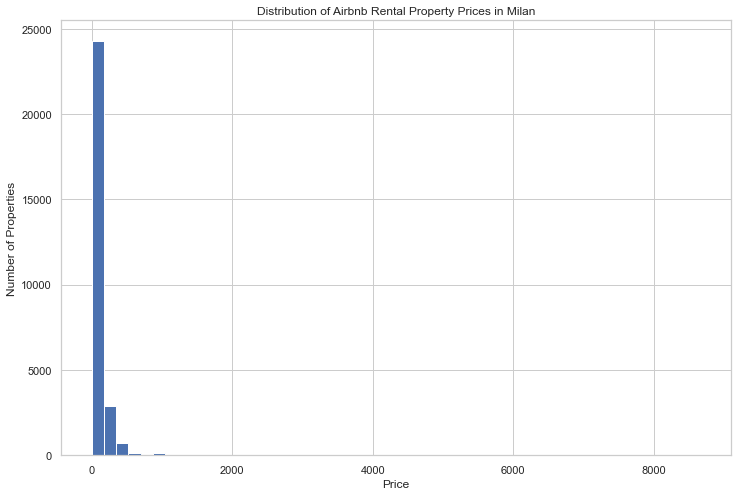

In [61]:
# price distribution

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(list_room.modal_price,bins=50)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Distribution of Airbnb Rental Property Prices in Milan')

#fig.savefig("price_dist.png", dpi=300)

In [62]:
# Clearly, the outliers drive my plot to the right and do not Delete outlier in order to plot distribution.
# I therefore decide to delete them to create a more explicative graph

In [63]:
list_room.modal_price.min(), list_room.modal_price.max()

(0, 8668)

In [64]:
media, stdeviation = list_room.modal_price.mean(), list_room.modal_price.std()

In [65]:
# outliers are removed

interval = stdeviation * 3
lower, upper = media - interval, media + interval

In [66]:
list_room_price = list_room.loc[(list_room['modal_price'] > lower) & (list_room['modal_price'] < upper)]

In [67]:
list_room_price.modal_price.min(),list_room_price.modal_price.max()

(0, 750)

In [68]:
len(list_room), len(list_room_price)

(28255, 28029)

In [69]:
media_noout, stdeviation_noout = list_room_price.modal_price.mean(), list_room_price.modal_price.std()
media_noout, stdeviation_noout 

(102.85843233793571, 89.00334576053326)

Text(0.8, 0.05, 'Source: Airbnb - Get data')

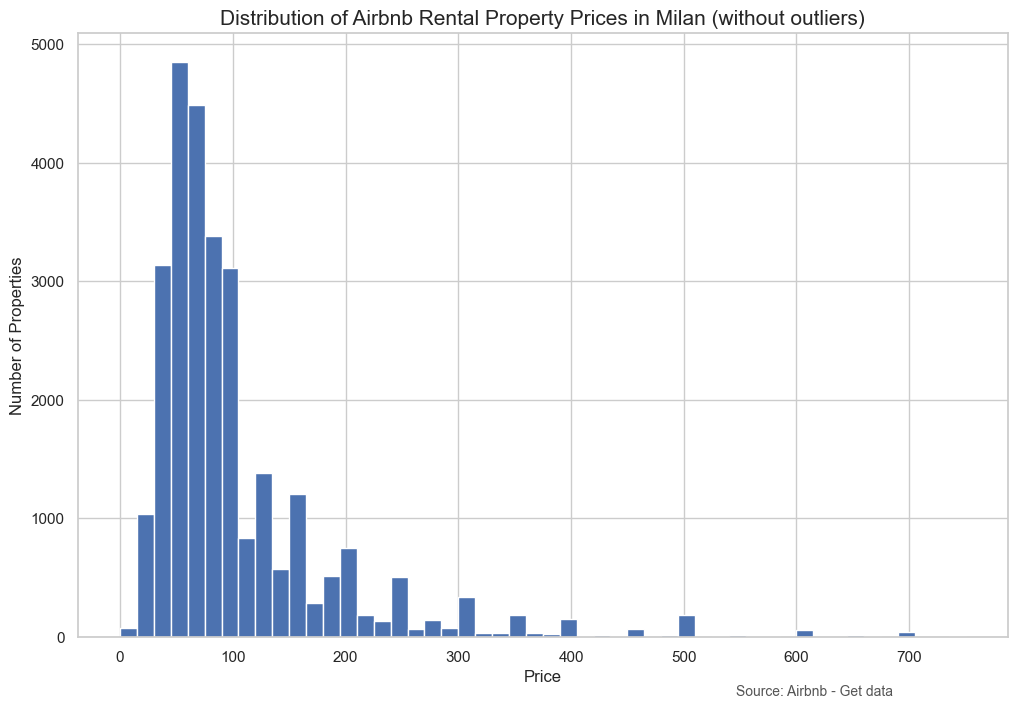

In [70]:
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.hist(list_room_price.modal_price,bins=50)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Distribution of Airbnb Rental Property Prices in Milan (without outliers)', 
             fontdict={'fontsize': 15, 'fontweight' : 3})
ax.annotate('Source: Airbnb - Get data', xy= (0.8, 0.05), xycoords='figure fraction', 
            horizontalalignment='center', verticalalignment='top', fontsize=10, color='#555555')


#fig.savefig("price_dist-noout.png", dpi=300)

Text(0.8, 0.05, 'Source: Airbnb - Get data')

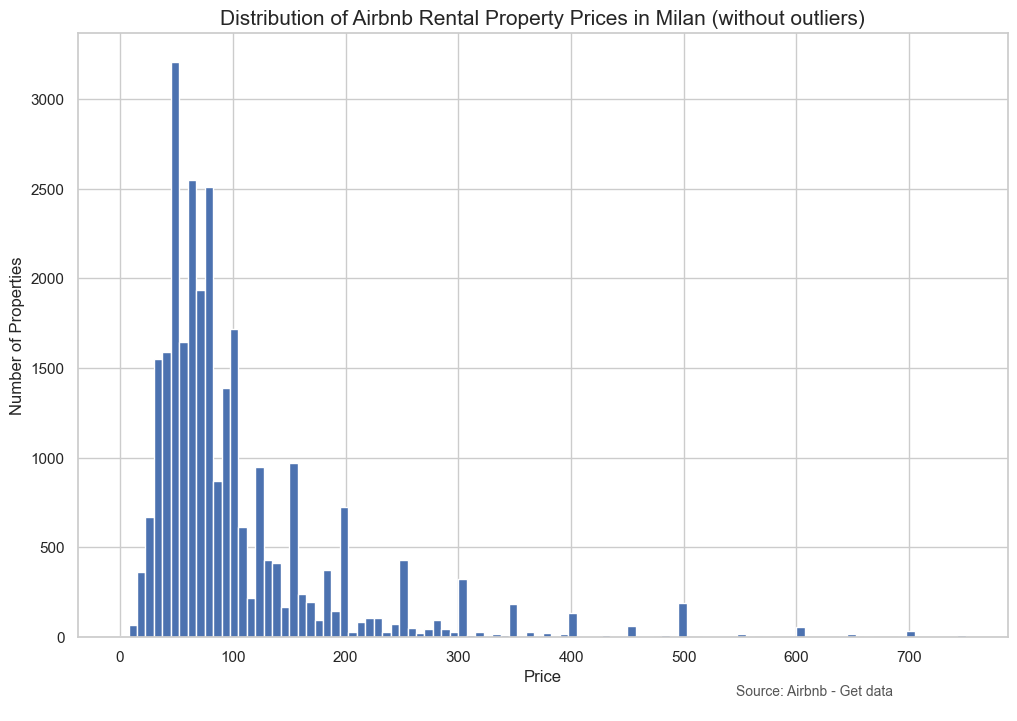

In [71]:
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.hist(list_room_price.modal_price,bins=100)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Distribution of Airbnb Rental Property Prices in Milan (without outliers)', 
             fontdict={'fontsize': 15, 'fontweight' : 3})
ax.annotate('Source: Airbnb - Get data', xy= (0.8, 0.05), xycoords='figure fraction', 
            horizontalalignment='center', verticalalignment='top', fontsize=10, color='#555555')


#fig.savefig("price_dist-noout_due.png", dpi=300)

In [72]:
# check for price distribution per neighbourhood NO OUTLIERS

order = quartieri.sort_values(by = 'avg', ascending = False).reset_index().neighbourhood

In [73]:
order

0     GIARDINI PORTA VENEZIA
1                      DUOMO
2                      BRERA
3             PARCO SEMPIONE
4                  GUASTALLA
               ...          
82                    TRENNO
83                  COMASINA
84      RONCHETTO DELLE RANE
85                PARCO NORD
86                QUINTOSOLE
Name: neighbourhood, Length: 87, dtype: object

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


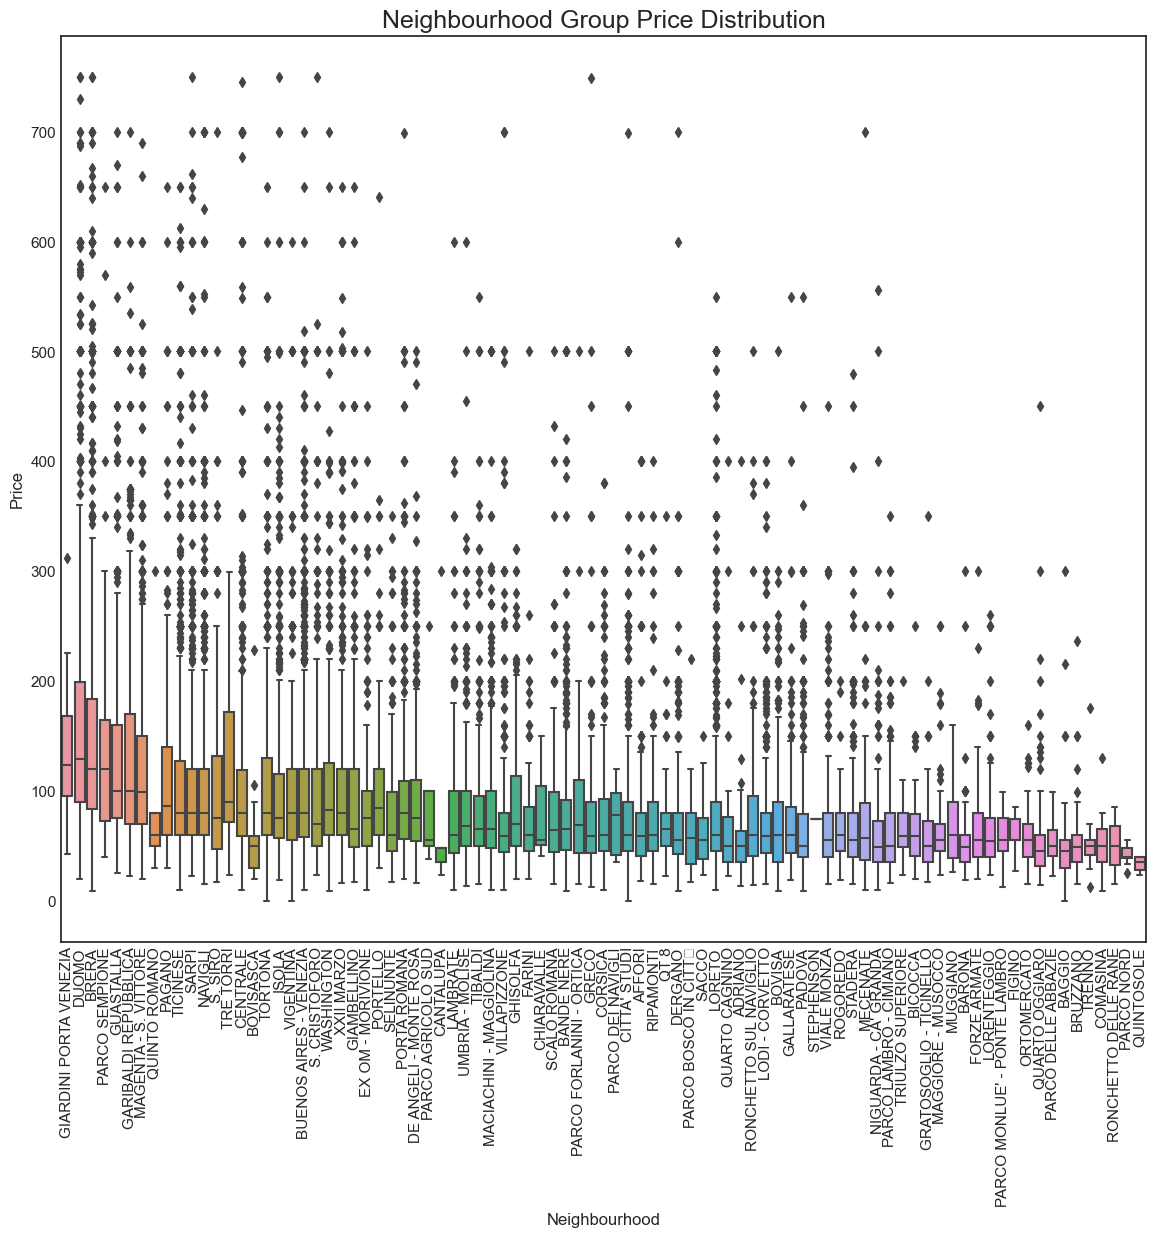

In [74]:
plt.style.use('seaborn-white')
plt.figure(figsize=(14,12), dpi= 100)
sns.boxplot(y='modal_price',x='neighbourhood',data = list_room_price, order = order)
plt.title('Neighbourhood Group Price Distribution', fontdict={'fontsize': 18,
 'fontweight':3})
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.show()

#plt.savefig('boxplot_neigh_price.png')

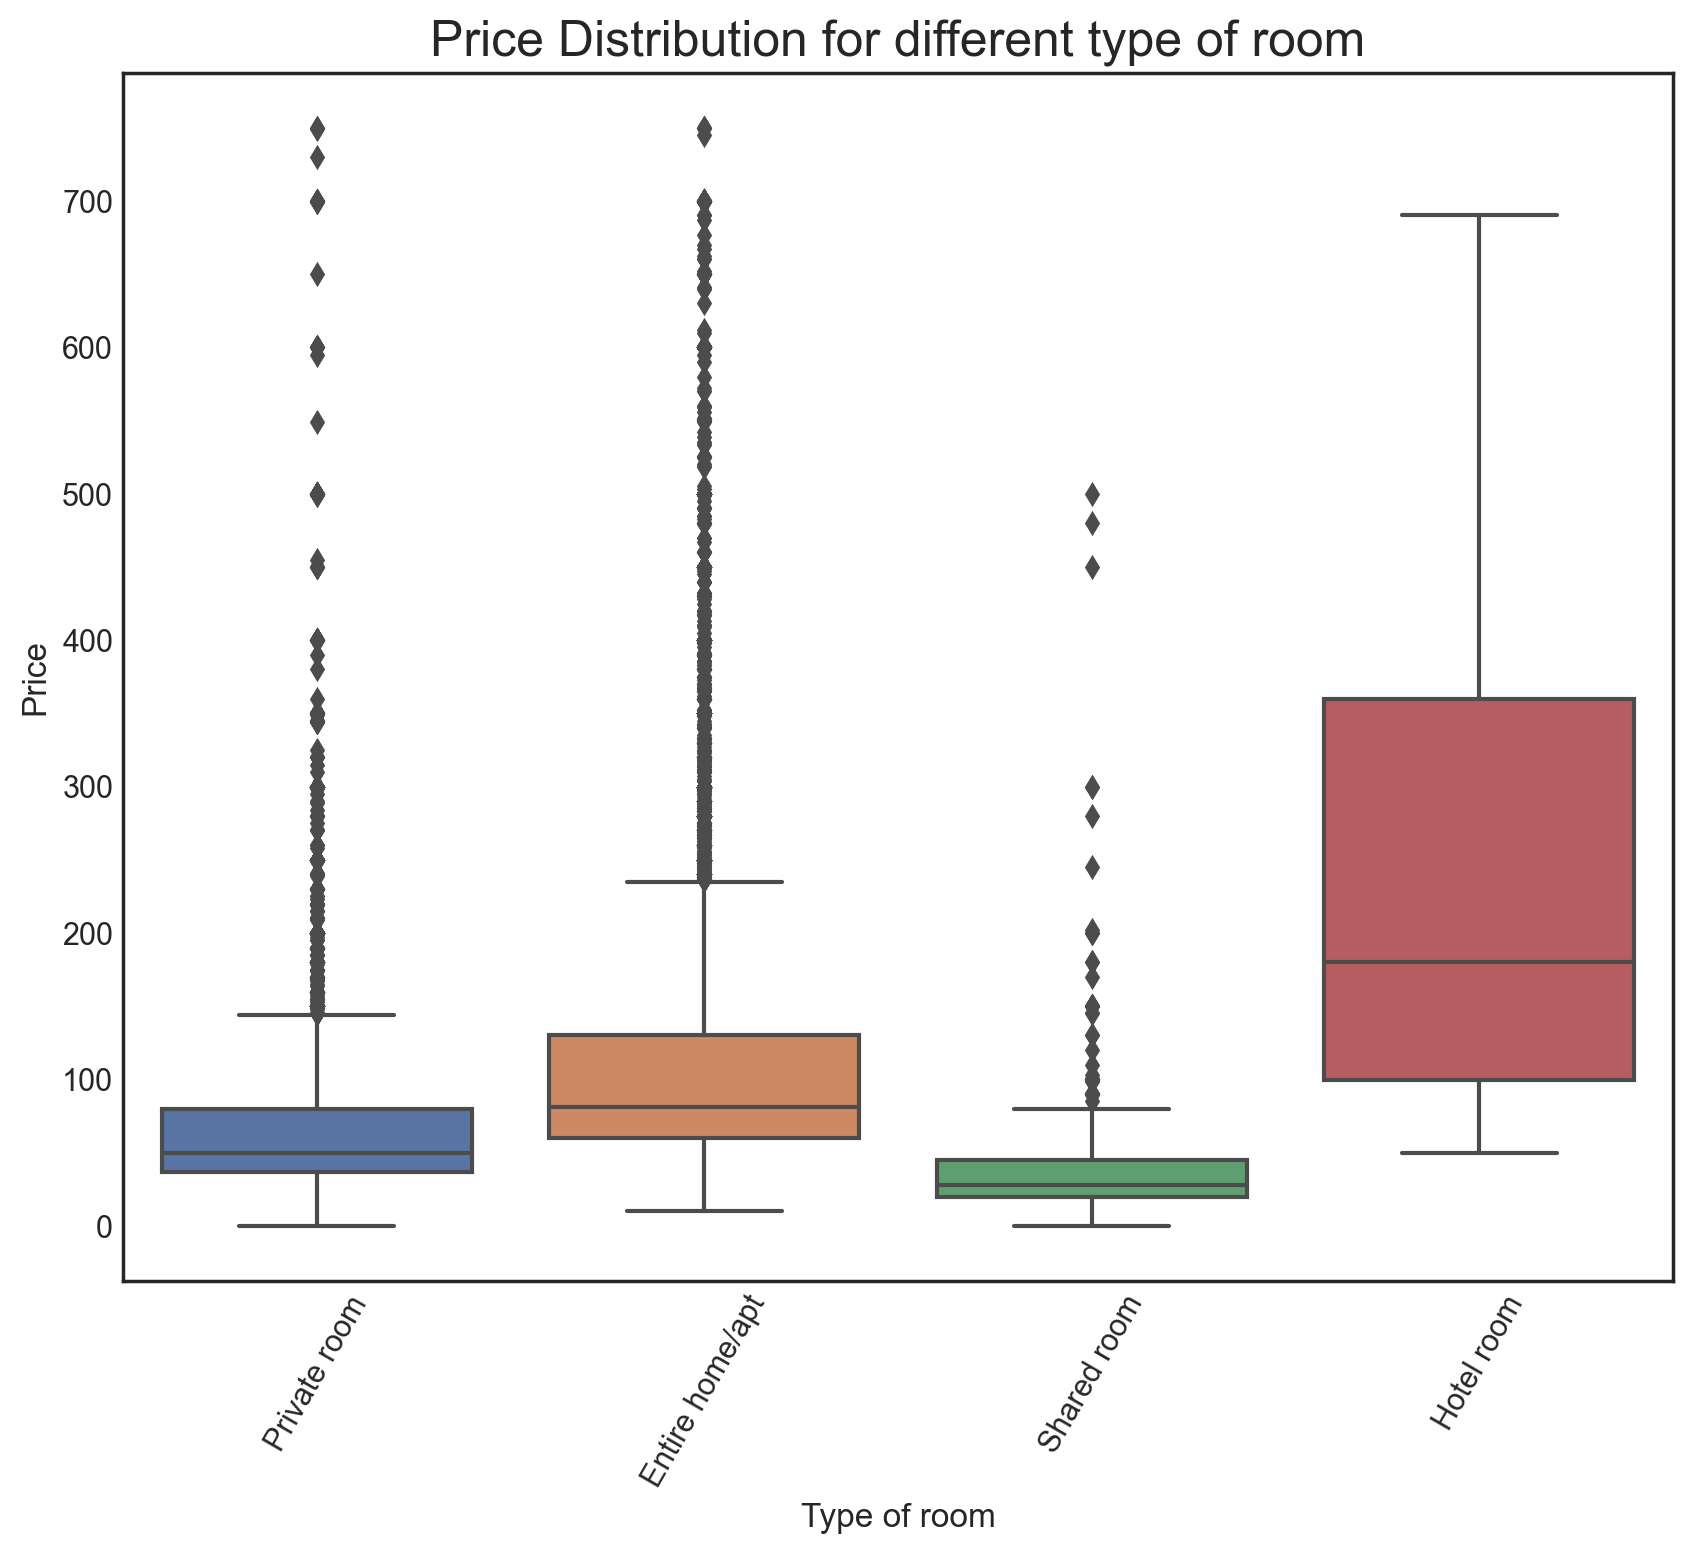

In [75]:
plt.style.use('seaborn-white')
plt.figure(figsize=(10,8), dpi = 200)
sns.boxplot(y='modal_price',x='modal_room_type',data = list_room_price)
plt.title('Price Distribution for different type of room', fontdict={'fontsize': 18,
 'fontweight':3})
plt.ylabel('Price')
plt.xlabel('Type of room')
plt.xticks(rotation=60)
plt.show()

#plt.savefig('boxplot_room_price.png')

In [76]:
# Reviews

In [77]:
list_room_price.number_of_reviews.describe()

count    28029.000000
mean        16.686254
std         43.450777
min          0.000000
25%          0.000000
50%          1.000000
75%         12.000000
max        718.000000
Name: number_of_reviews, dtype: float64

Text(0.8, 0.05, 'Source: Airbnb - Get data')

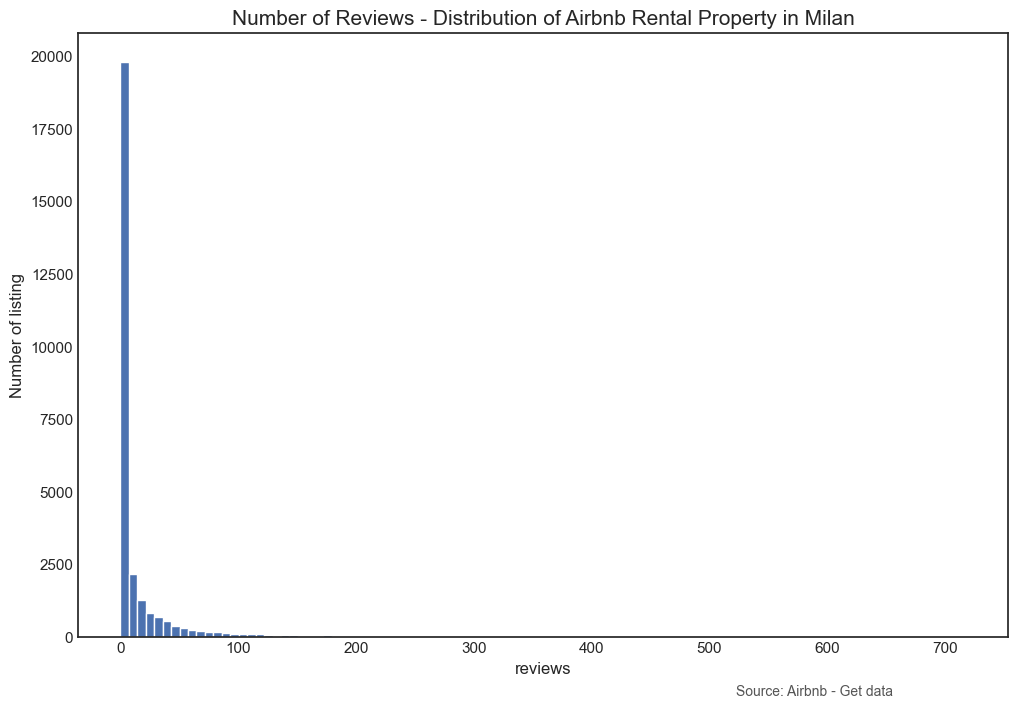

In [78]:
# histogram with the total number of reviews

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.hist(list_room.number_of_reviews,bins=100)
ax.set_xlabel('reviews')
ax.set_ylabel('Number of listing')
ax.set_title('Number of Reviews - Distribution of Airbnb Rental Property in Milan', 
             fontdict={'fontsize': 15, 'fontweight' : 3})
ax.annotate('Source: Airbnb - Get data', xy= (0.8, 0.05), xycoords='figure fraction', 
            horizontalalignment='center', verticalalignment='top', fontsize=10, color='#555555')


#fig.savefig("reviews-totnum.png", dpi=300)

Text(0.8, 0.05, 'Source: Airbnb - Get data')

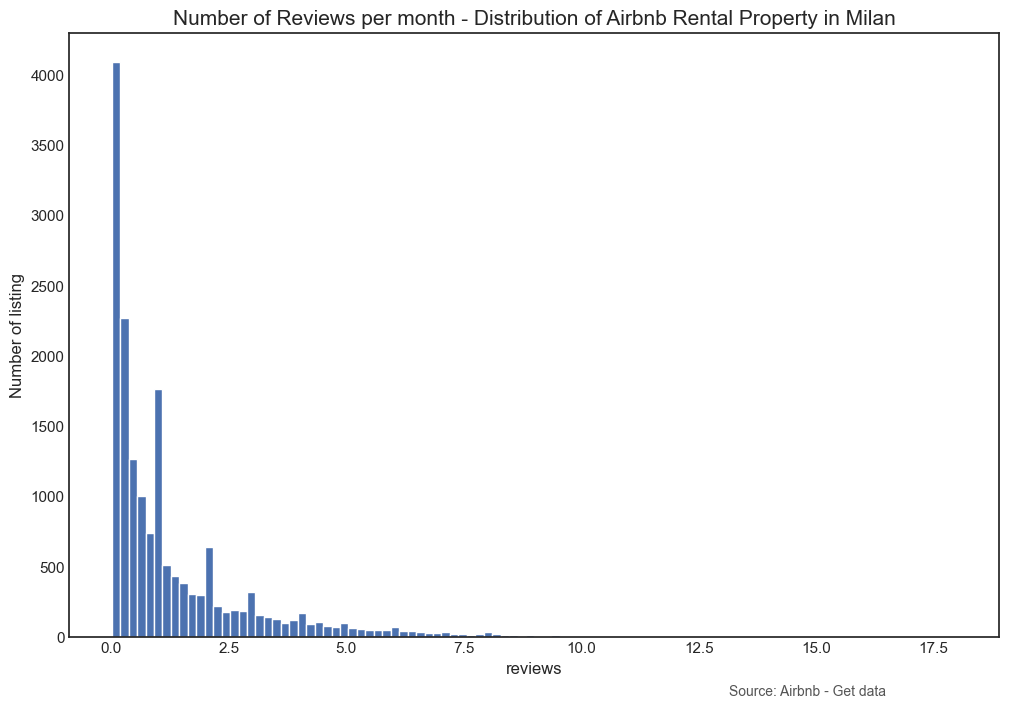

In [79]:
# histogram with the number of reviews per month

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
ax.hist(list_room.reviews_per_month,bins=100)
ax.set_xlabel('reviews')
ax.set_ylabel('Number of listing')
ax.set_title('Number of Reviews per month - Distribution of Airbnb Rental Property in Milan', 
             fontdict={'fontsize': 15, 'fontweight' : 3})
ax.annotate('Source: Airbnb - Get data', xy= (0.8, 0.05), xycoords='figure fraction', 
            horizontalalignment='center', verticalalignment='top', fontsize=10, color='#555555')


#fig.savefig("reviews-permonth.png", dpi=300)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


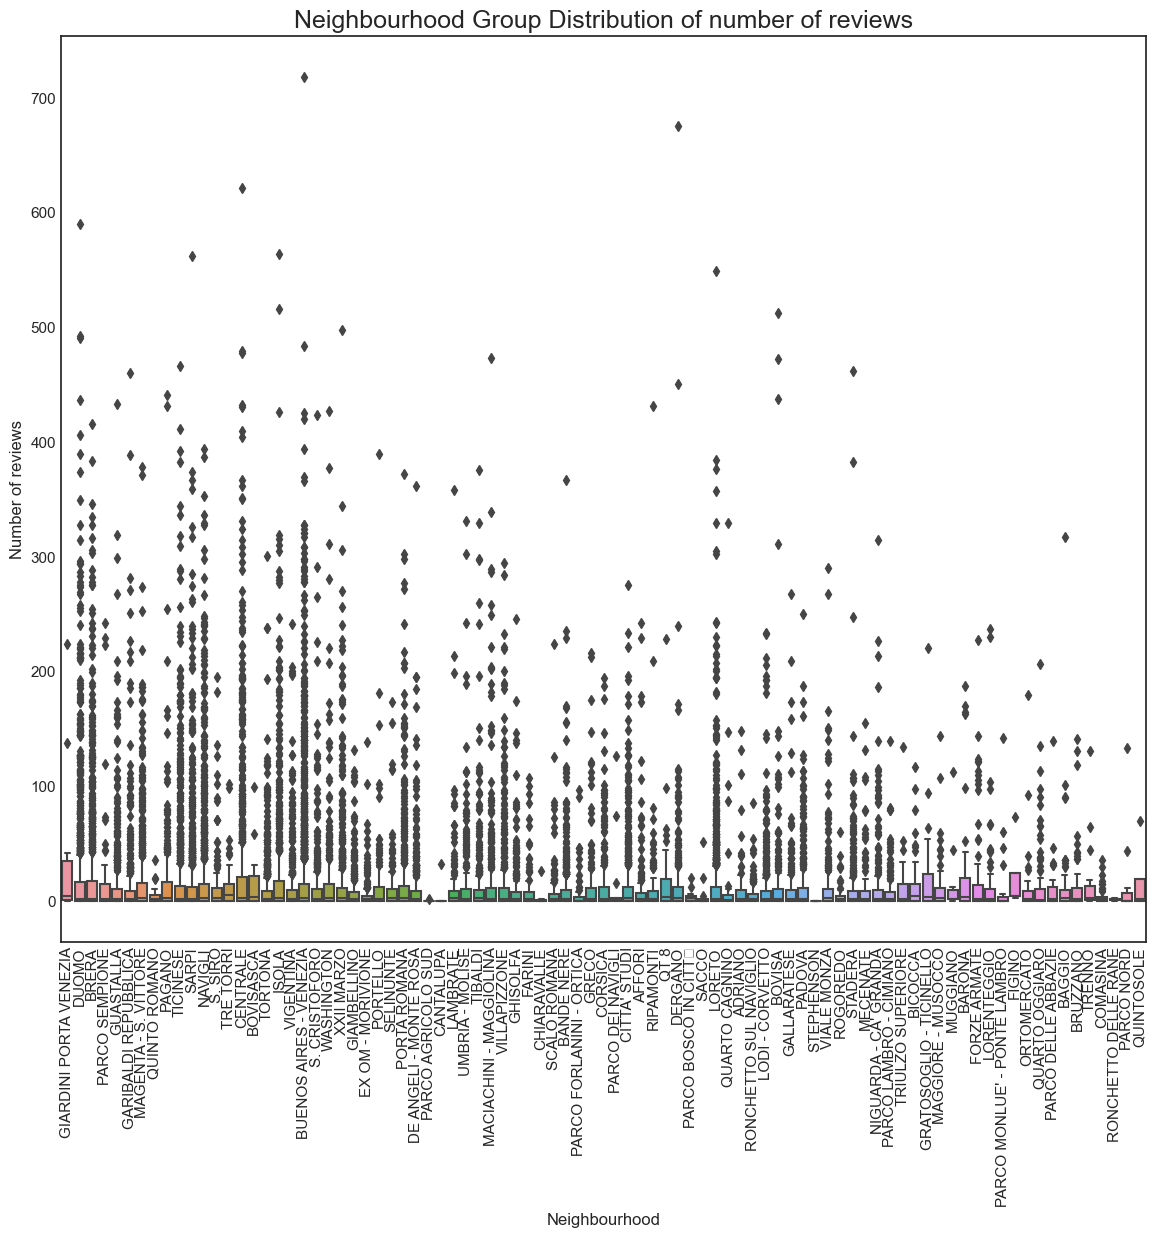

In [80]:
# reviews per neighbourhood

plt.style.use('seaborn-white')
plt.figure(figsize=(14,12), dpi= 100)
sns.boxplot(y='number_of_reviews',x='neighbourhood',data = list_room, order = order)
plt.title('Neighbourhood Group Distribution of number of reviews', fontdict={'fontsize': 18,
 'fontweight':3})
plt.xticks(rotation=90)
plt.ylabel('Number of reviews')
plt.xlabel('Neighbourhood')
plt.show()

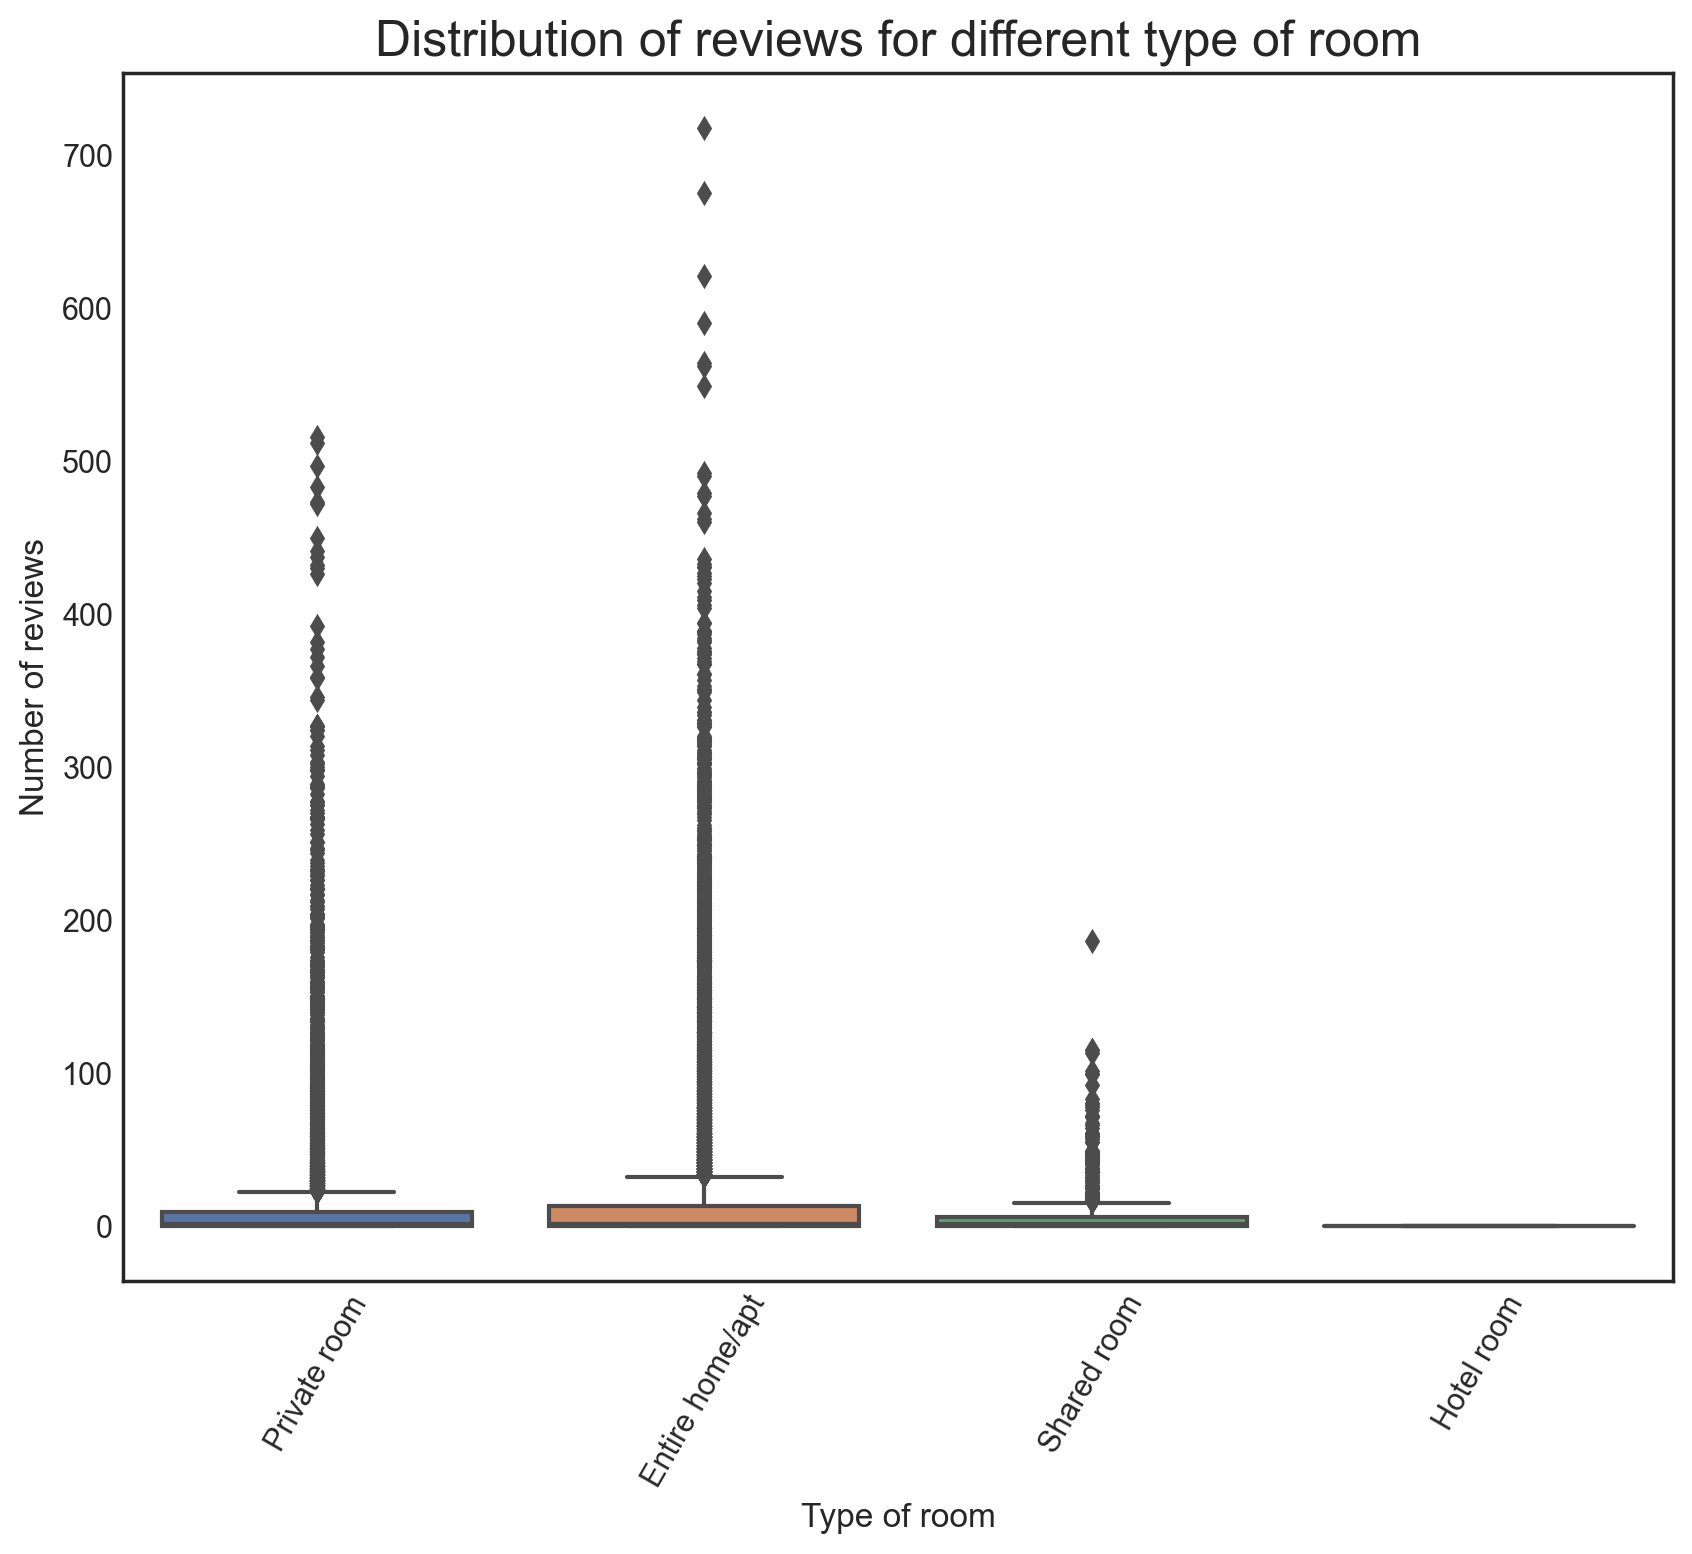

In [81]:
plt.style.use('seaborn-white')
plt.figure(figsize=(10,8), dpi = 200)
sns.boxplot(y='number_of_reviews',x='modal_room_type',data = list_room)
plt.title('Distribution of reviews for different type of room', fontdict={'fontsize': 18,
 'fontweight':3})
plt.ylabel('Number of reviews')
plt.xlabel('Type of room')
plt.xticks(rotation=60)
plt.show()

In [82]:
# different scatter to check for any relationship between price and reviews

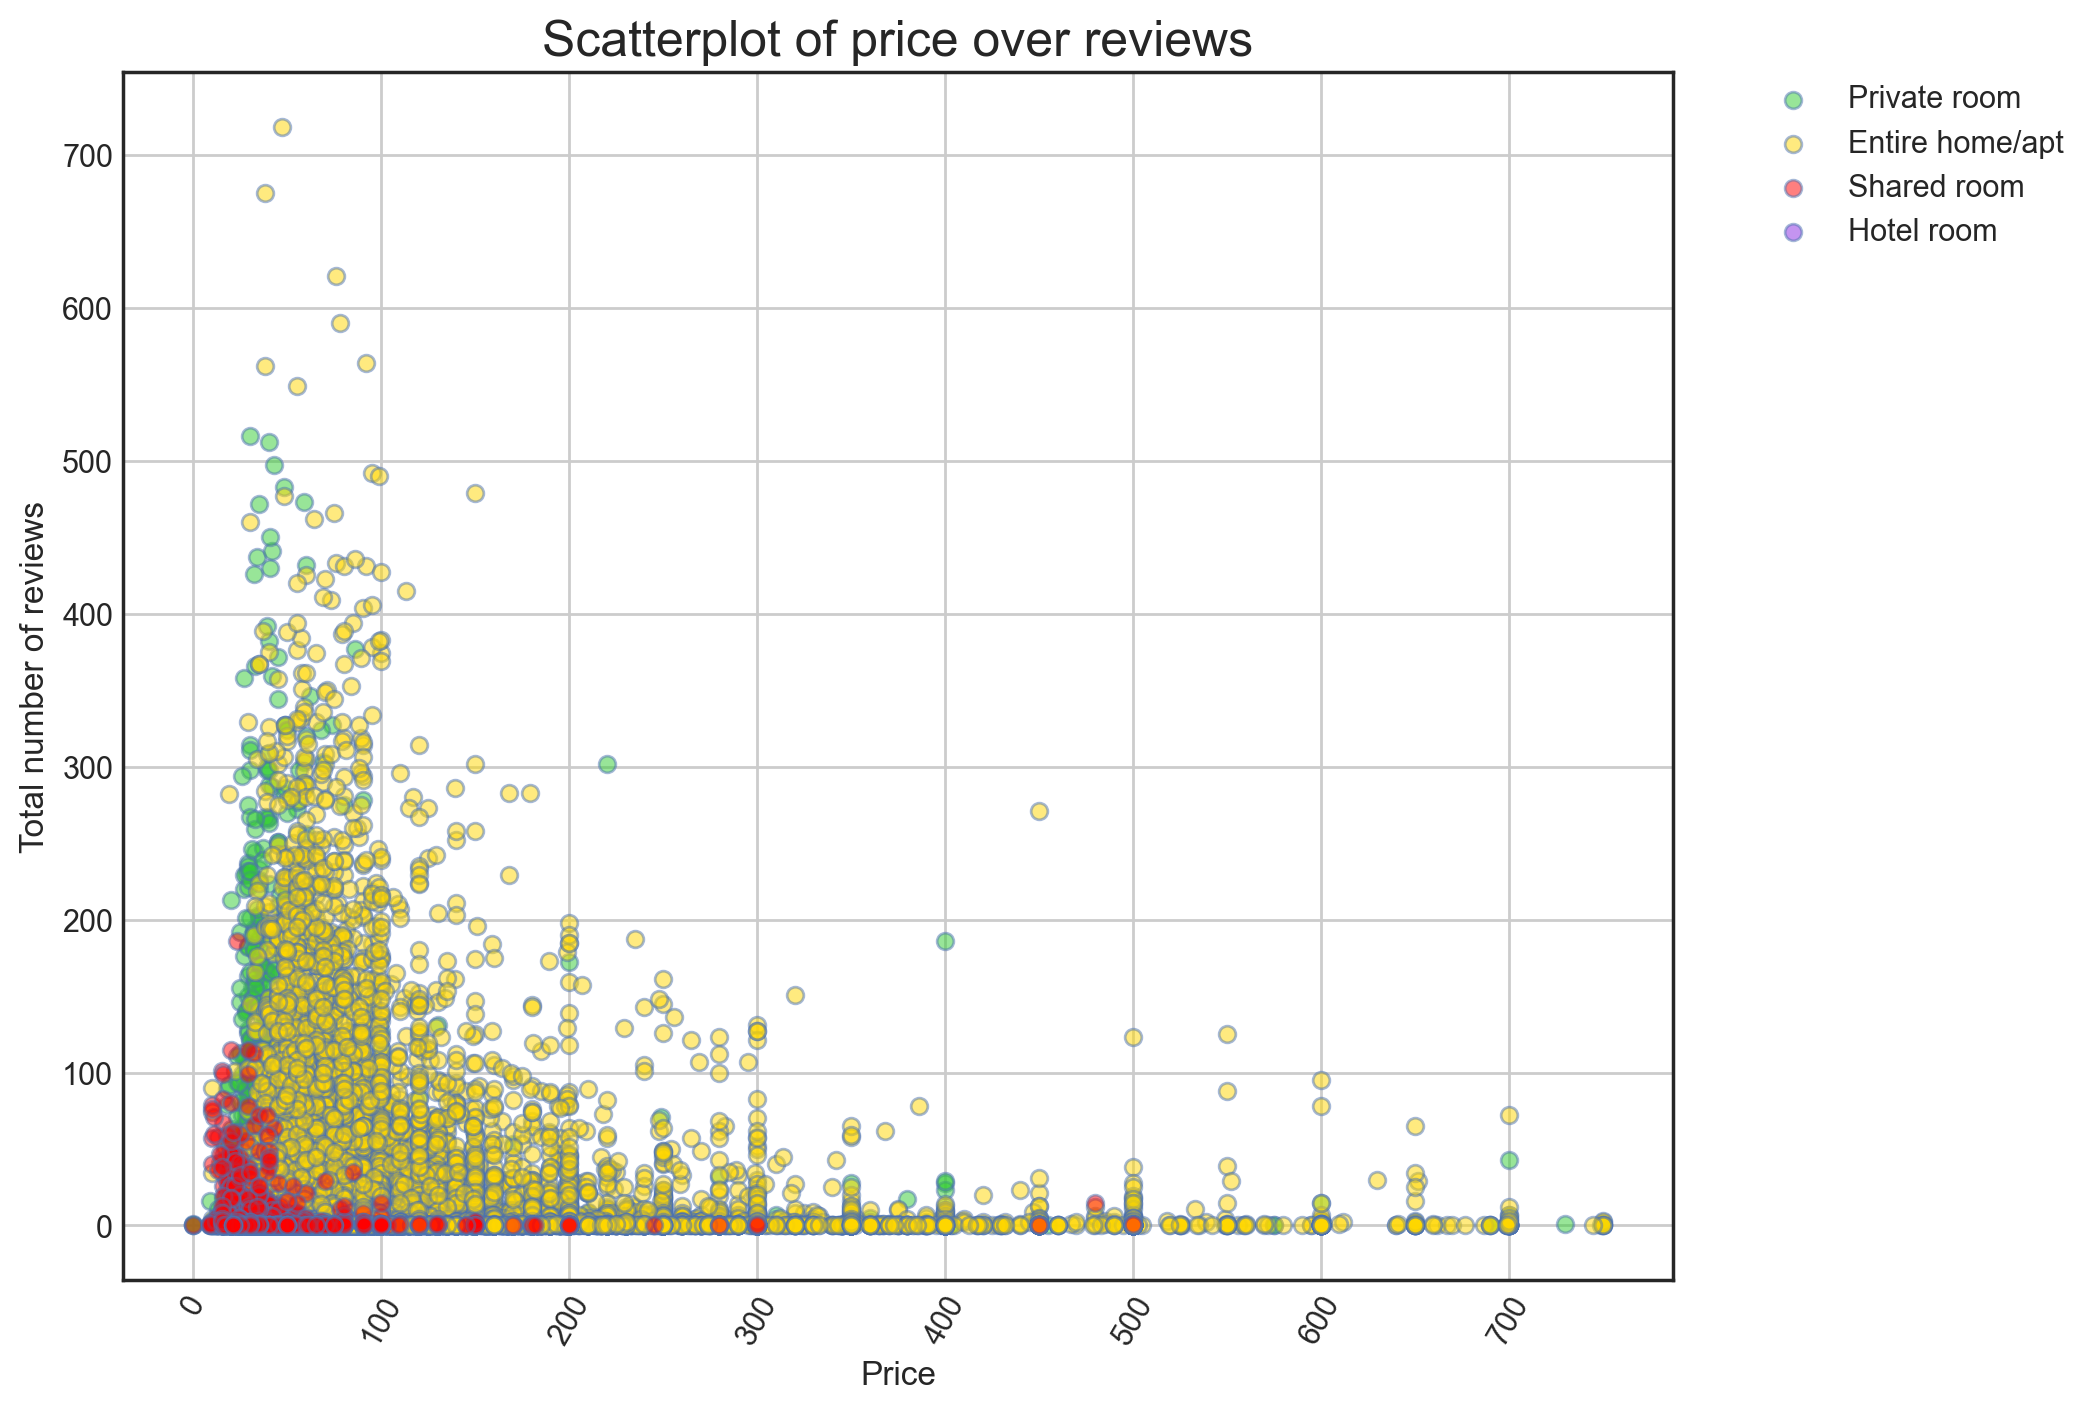

In [83]:
plt.style.use('seaborn-white')
plt.figure(figsize=(10,8), dpi = 200)

colors = {'Private room':'limegreen', 'Entire home/apt':'gold', 
                'Shared room':'red', 'Hotel room': 'blueviolet'}            

for tipo in list_room_price.modal_room_type.unique():
    x = list_room_price[list_room_price['room_type'] == tipo].modal_price
    y = list_room_price[list_room_price['room_type'] == tipo].number_of_reviews
    plt.scatter(x, y, c=colors[tipo], edgecolors='b', alpha=0.5)

plt.title('Scatterplot of price over reviews', fontdict={'fontsize': 18,
 'fontweight':3})

plt.legend(list_room_price.modal_room_type.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.ylabel('Total number of reviews')
plt.xlabel('Price')
plt.xticks(rotation=60)
plt.show()

#plt.savefig("scatter_review-prezzo.png", dpi=300)

Text(0.8, 0.1, 'Source: Airbnb - Get data')

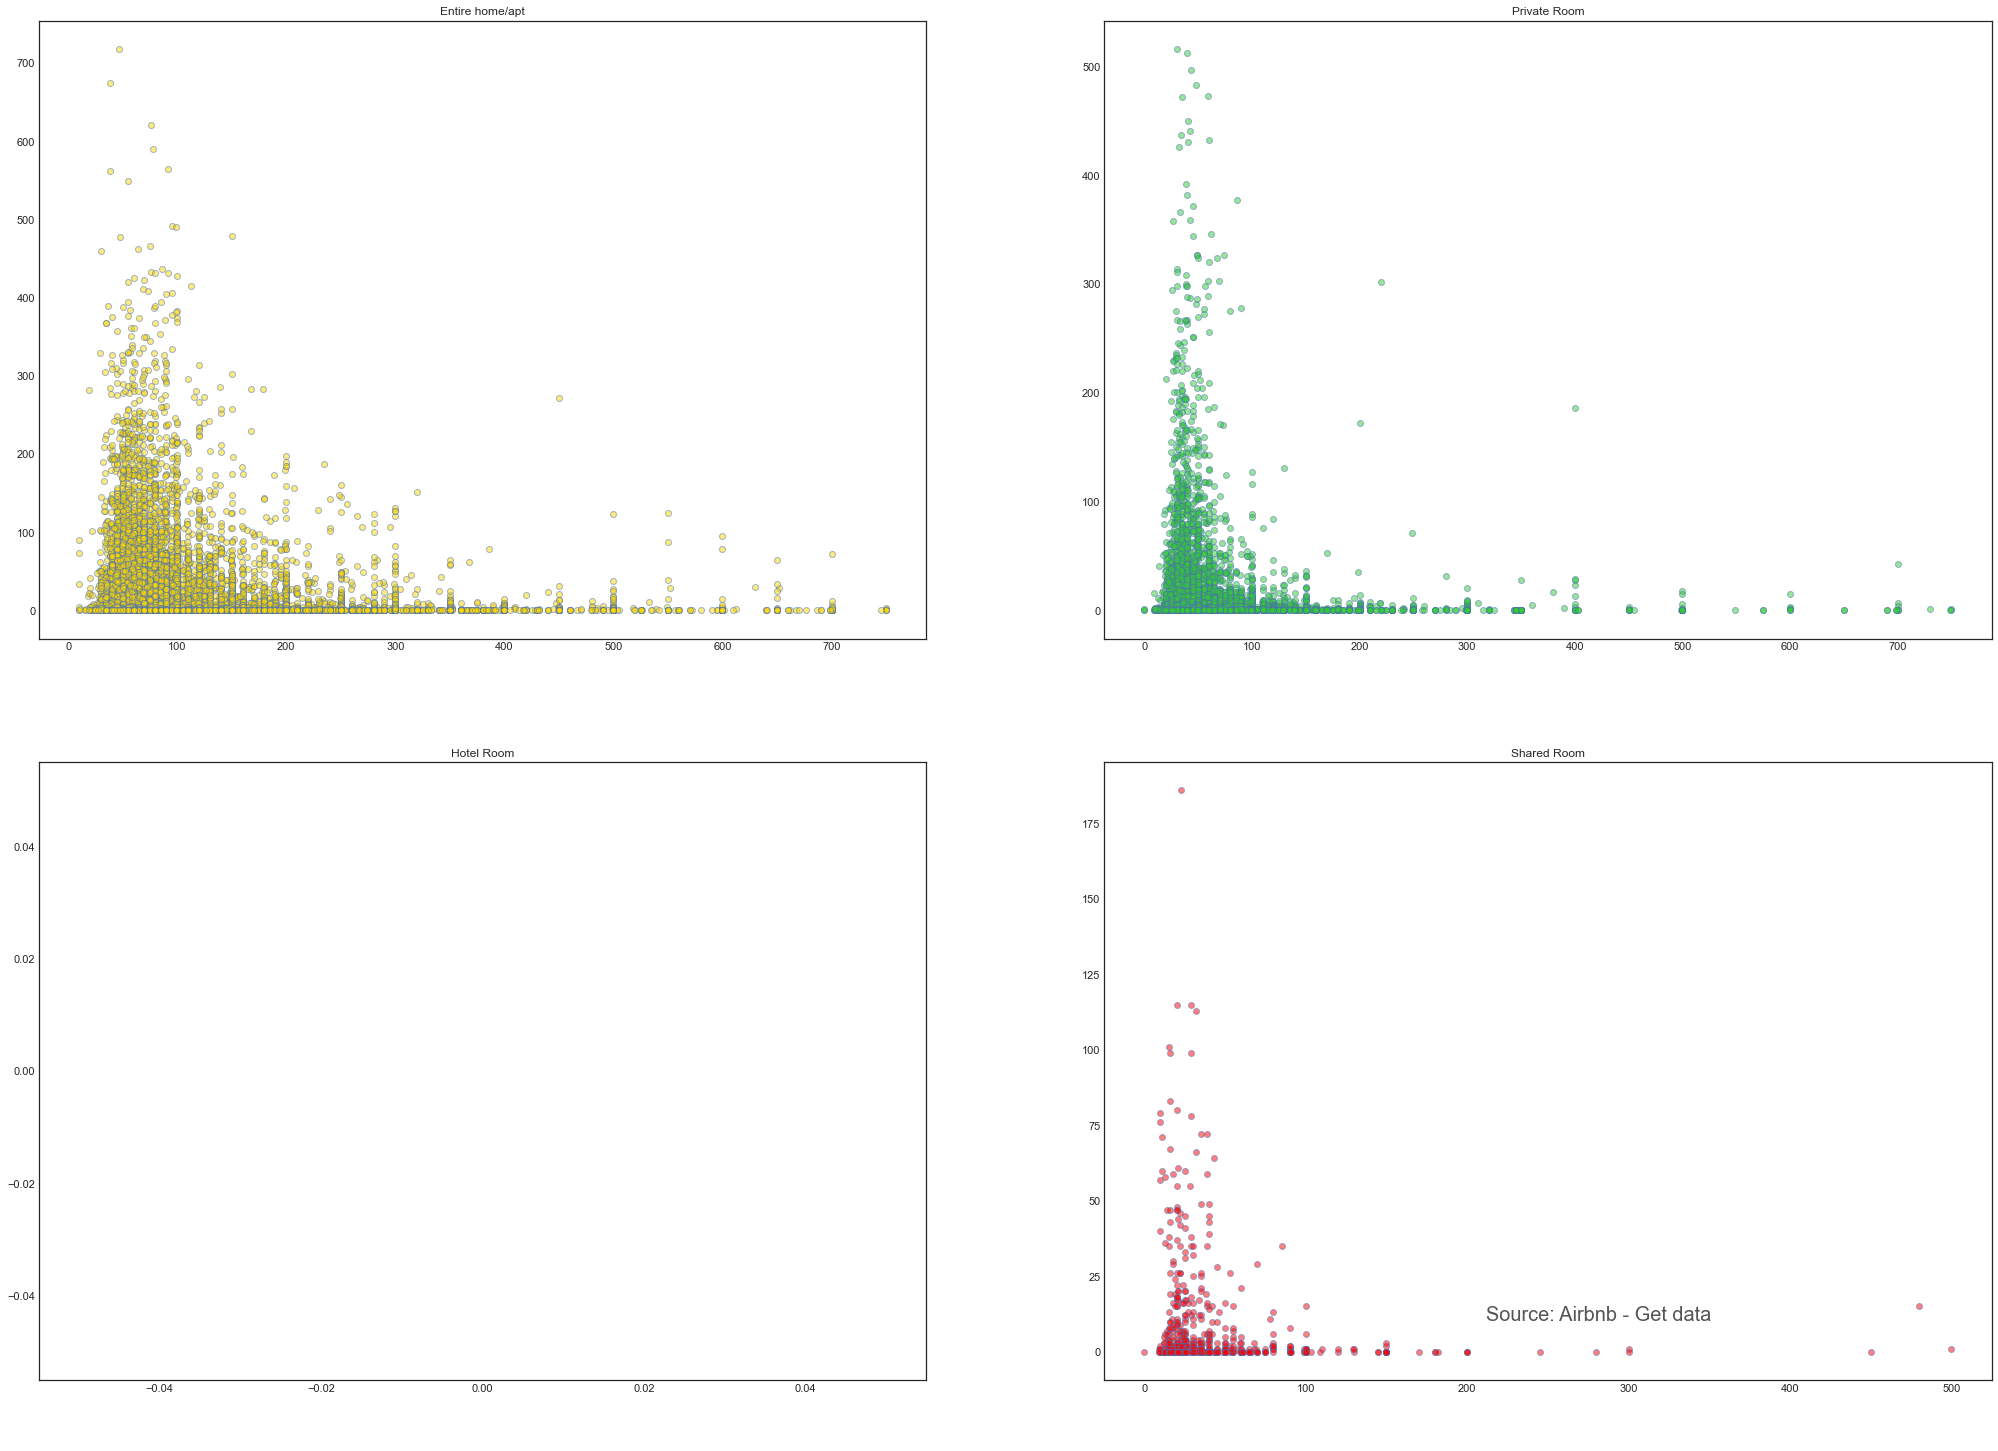

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(35, 25))

axes[0, 0].set_title('Entire home/apt')
x = list_room_price[list_room_price['room_type'] == 'Entire home/apt'].modal_price
y = list_room_price[list_room_price['room_type'] == 'Entire home/apt'].number_of_reviews
axes[0, 0].scatter(x, y, c=colors['Entire home/apt'], edgecolors='b', alpha=0.5)


axes[0,1].set_title('Private Room')
x = list_room_price[list_room_price['room_type'] == 'Private room'].modal_price
y = list_room_price[list_room_price['room_type'] == 'Private room'].number_of_reviews
axes[0, 1].scatter(x, y, c=colors['Private room'], edgecolors='b', alpha=0.5)


axes[1, 0].set_title('Hotel Room')
x = list_room_price[list_room_price['room_type'] == 'Hotel room'].modal_price
y = list_room_price[list_room_price['room_type'] == 'Hotel room'].number_of_reviews
axes[1, 0].scatter(x, y, c=colors['Hotel room'], edgecolors='b', alpha=0.5)


axes[1, 1].set_title('Shared Room')
x = list_room_price[list_room_price['room_type'] == 'Shared room'].modal_price
y = list_room_price[list_room_price['room_type'] == 'Shared room'].number_of_reviews
axes[1, 1].scatter(x, y, c=colors['Shared room'], edgecolors='b', alpha=0.5)


axes[1,1].annotate('Source: Airbnb - Get data', xy= (0.80, .1), xycoords='figure fraction', horizontalalignment='center', verticalalignment='top', fontsize=20, color='#555555')

#fig.savefig("scatter_piccoli_review-prezzo.png", dpi=300)

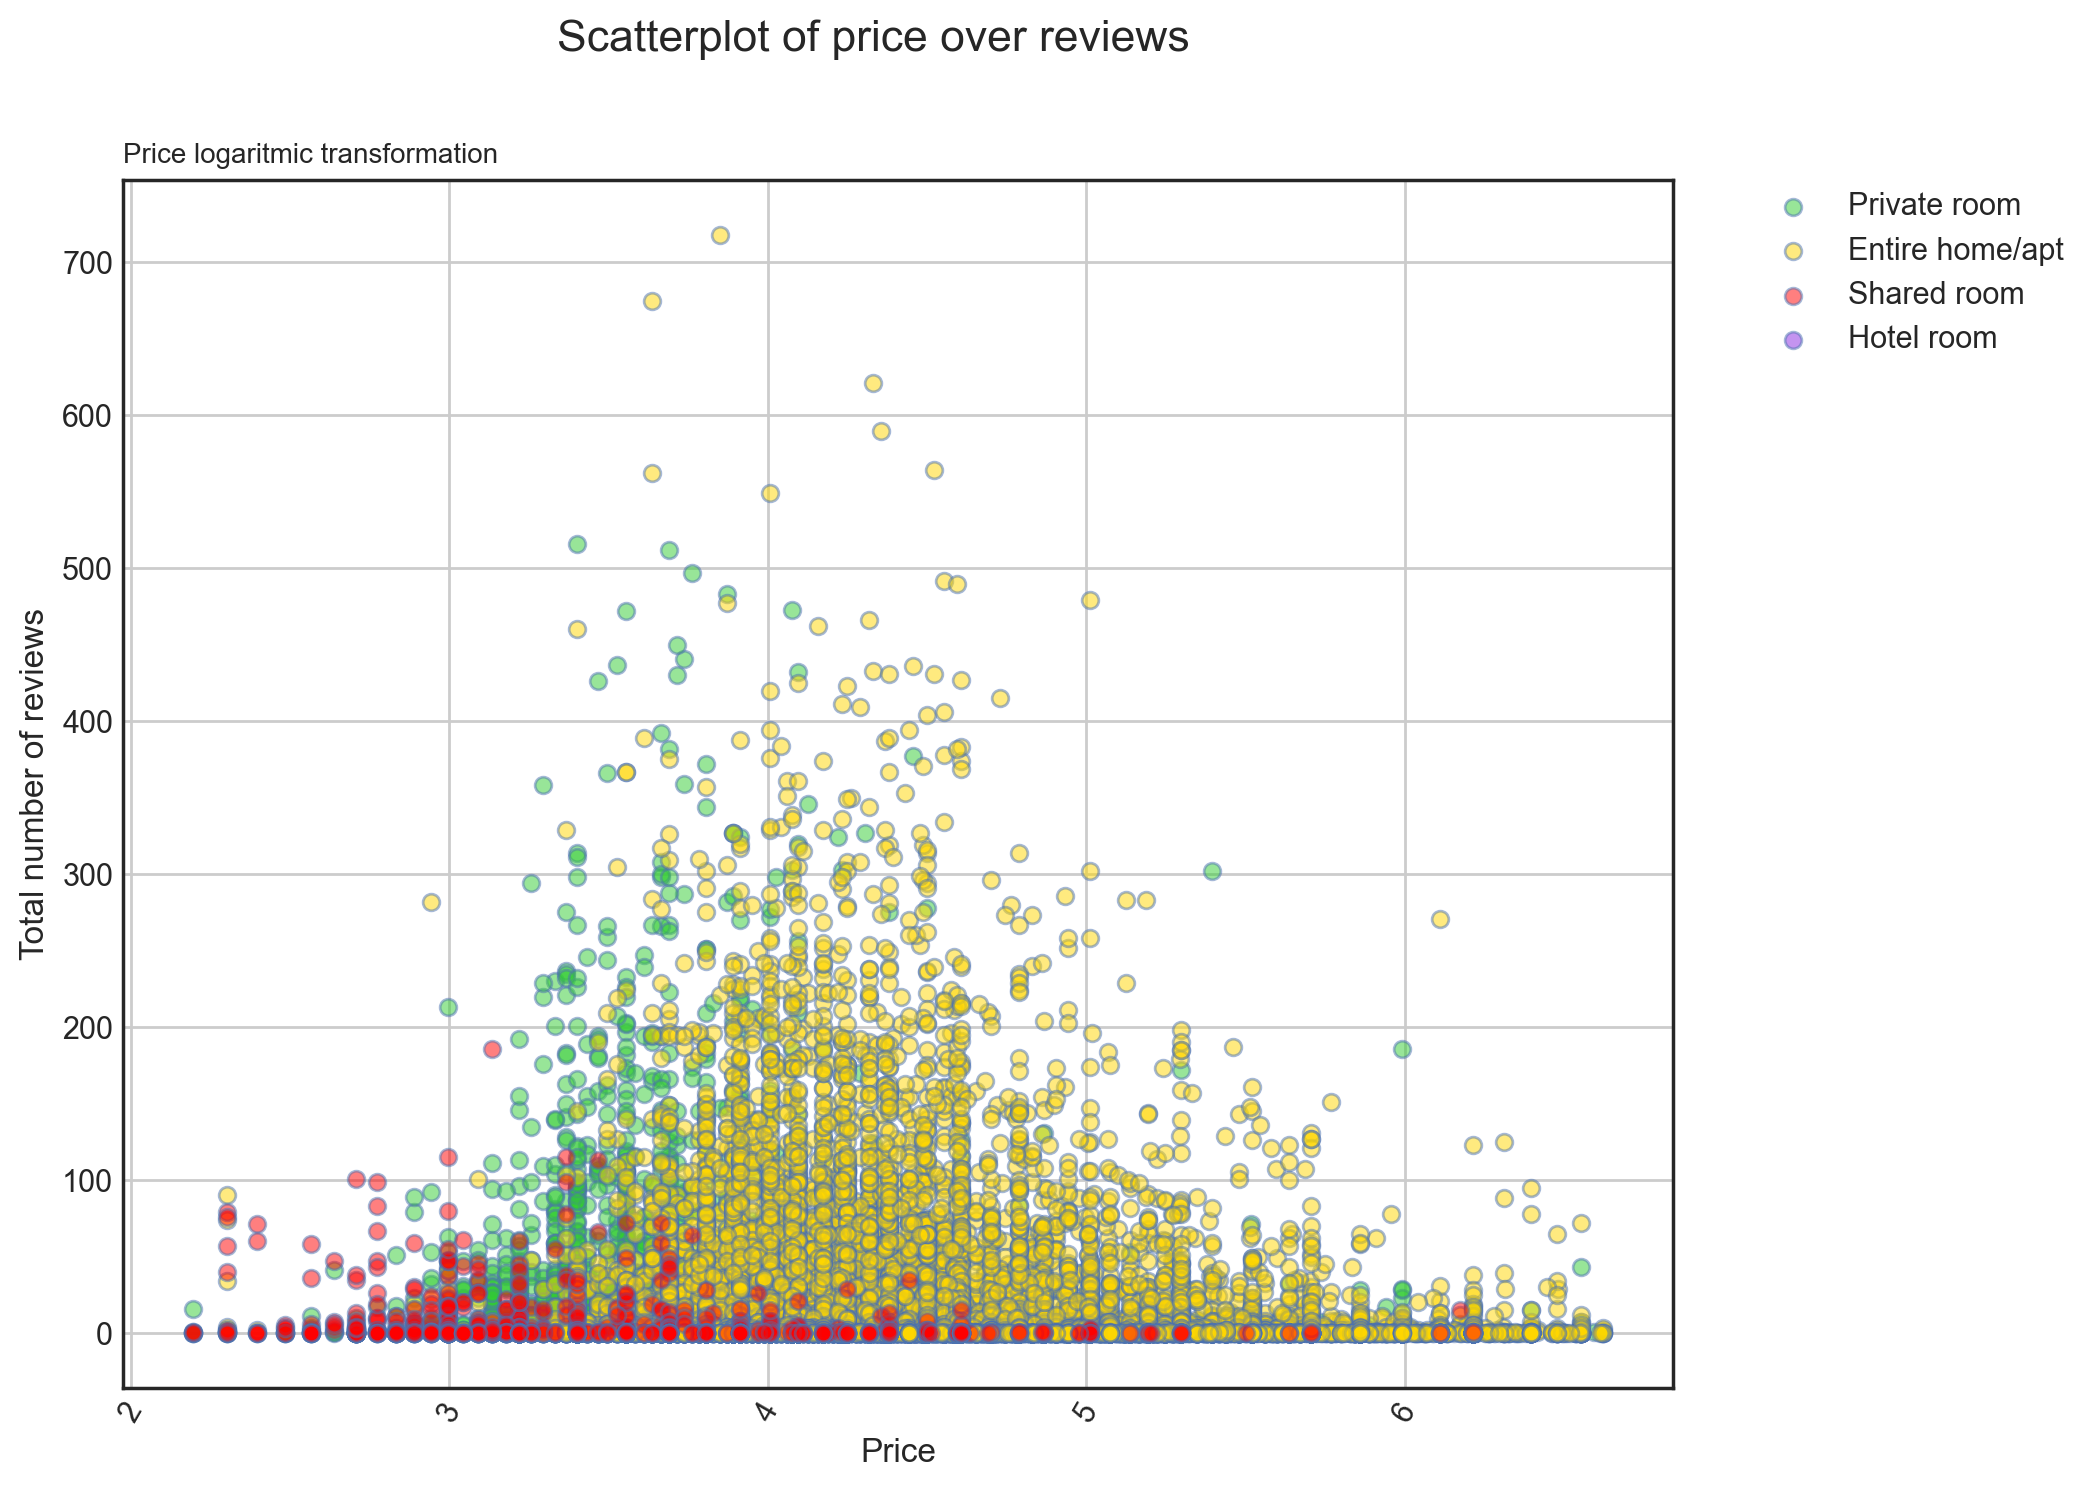

In [85]:
plt.style.use('seaborn-white')
plt.figure(figsize=(10,8), dpi = 200)

colors = {'Private room':'limegreen', 'Entire home/apt':'gold', 
                'Shared room':'red', 'Hotel room': 'blueviolet'}            

for tipo in list_room_price.modal_room_type.unique():
    x = list_room_price[list_room_price['room_type'] == tipo].modal_price.apply(np.log)
    y = list_room_price[list_room_price['room_type'] == tipo].number_of_reviews
    plt.scatter(x, y, c=colors[tipo], edgecolors='b', alpha=0.5)

plt.suptitle("Scatterplot of price over reviews", fontsize=16, horizontalalignment = 'center')

plt.title("Price logaritmic transformation", fontsize=10, loc = 'left')

plt.legend(list_room_price.modal_room_type.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.ylabel('Total number of reviews')
plt.xlabel('Price')
plt.xticks(rotation=60)
plt.show()
#fig.savefig("price_log-scatter.png", dpi=300)

In [86]:
# checking if the average has some differences

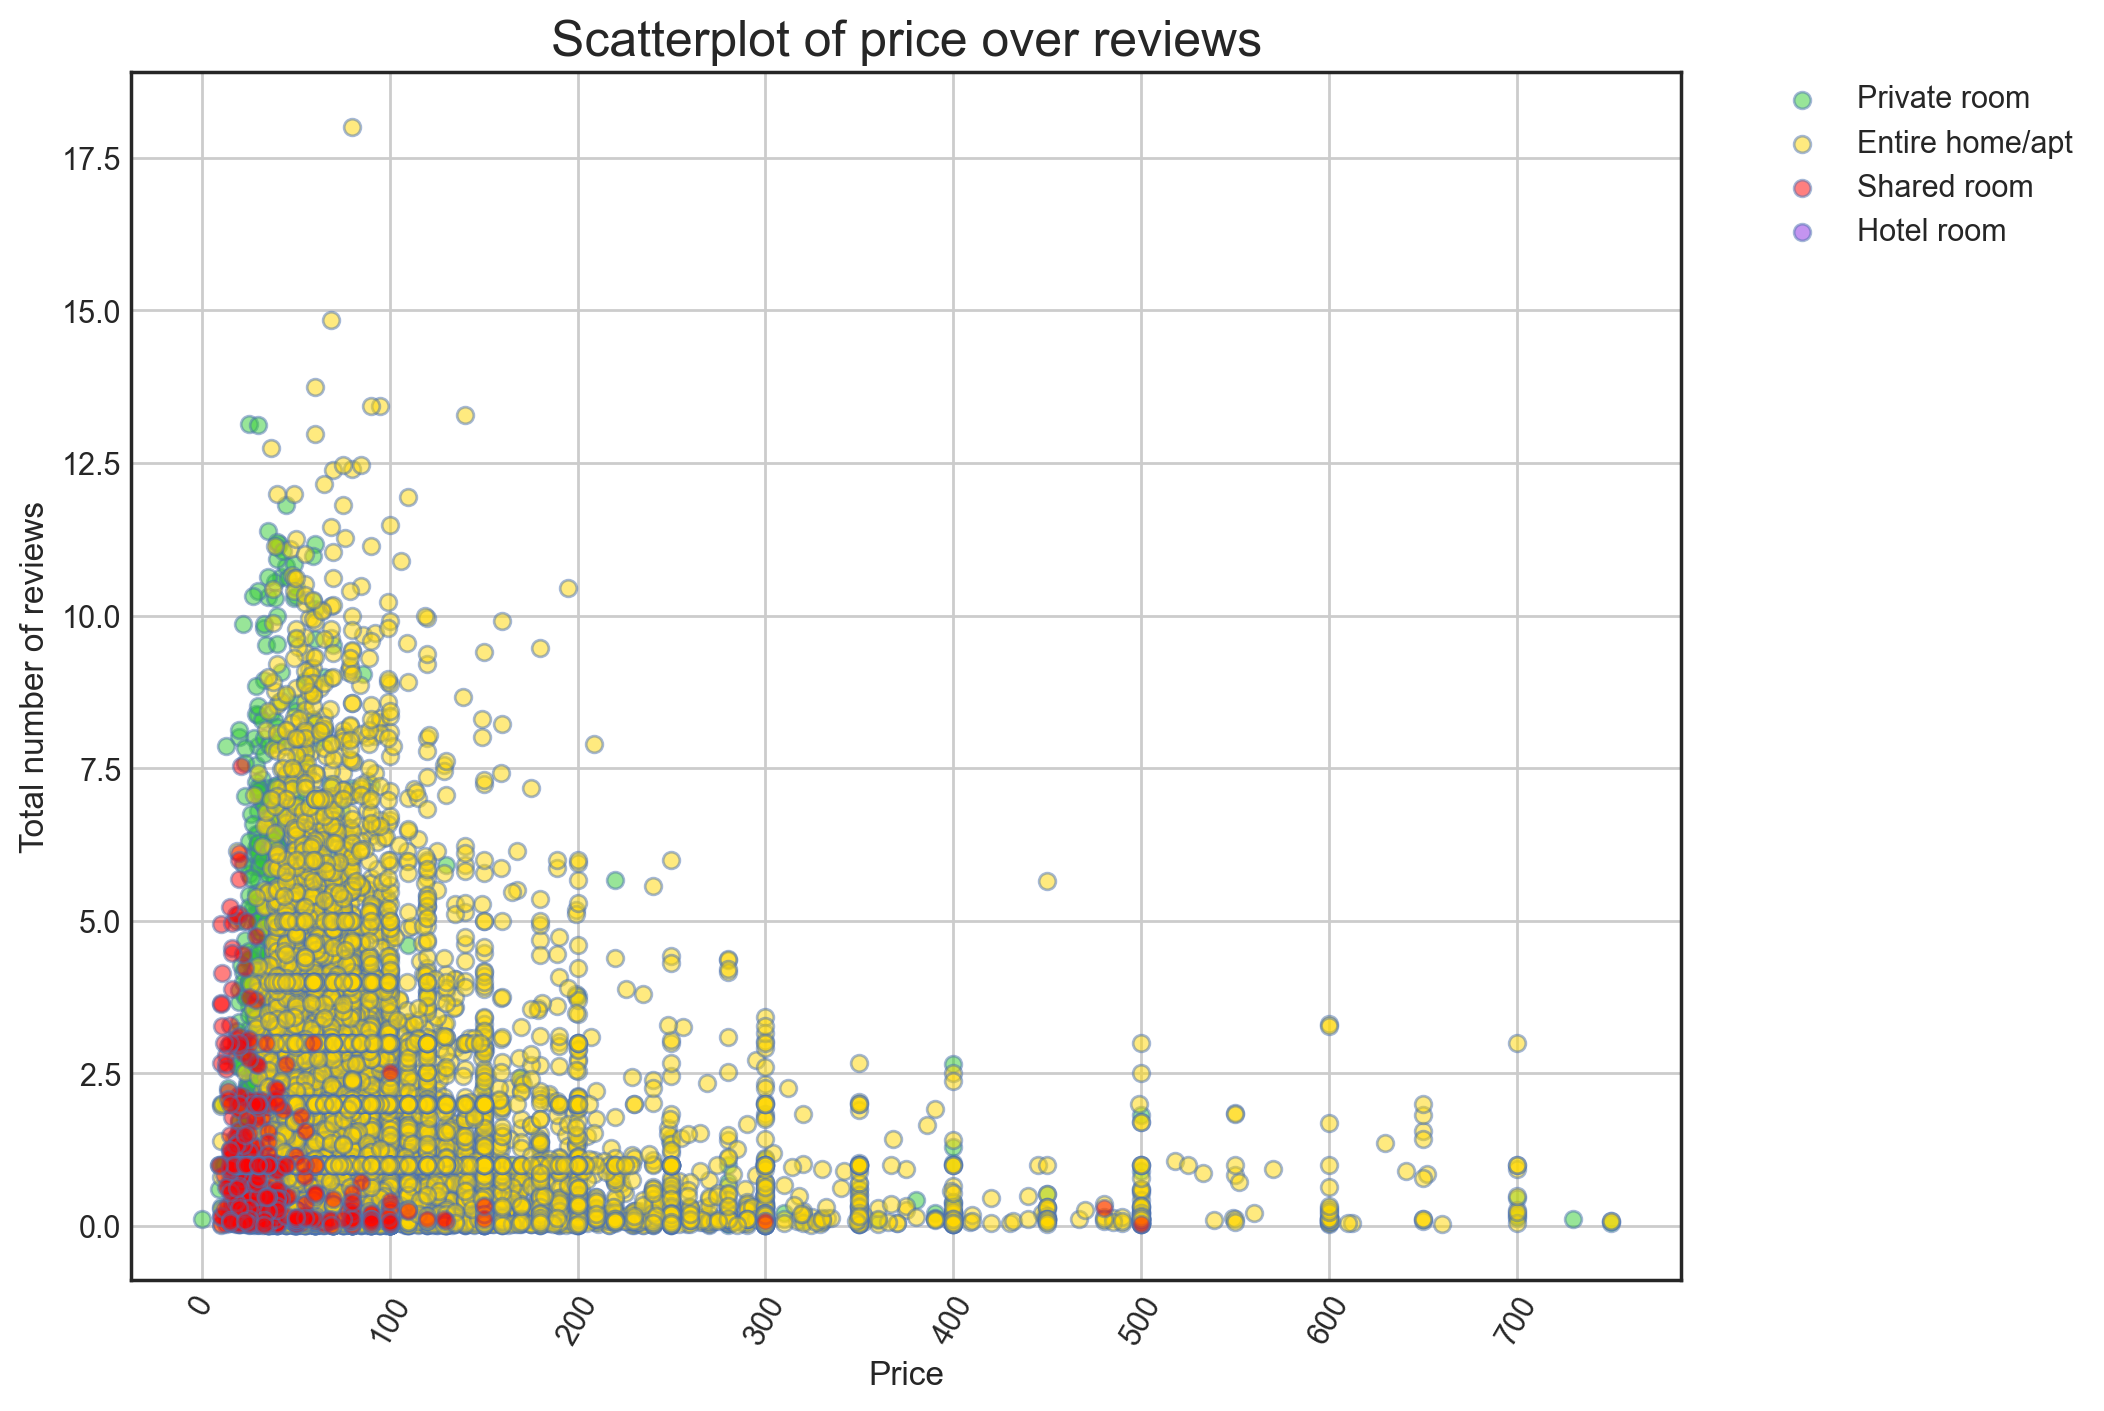

In [87]:
plt.style.use('seaborn-white')
plt.figure(figsize=(10,8), dpi = 200)

colors = {'Private room':'limegreen', 'Entire home/apt':'gold', 
                'Shared room':'red', 'Hotel room': 'blueviolet'}            

for tipo in list_room_price.modal_room_type.unique():
    x = list_room_price[list_room_price['room_type'] == tipo].modal_price
    y = list_room_price[list_room_price['room_type'] == tipo].reviews_per_month
    plt.scatter(x, y, c=colors[tipo], edgecolors='b', alpha=0.5)

plt.title('Scatterplot of price over reviews', fontdict={'fontsize': 18,
 'fontweight':3})

plt.legend(list_room_price.modal_room_type.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.ylabel('Total number of reviews')
plt.xlabel('Price')
plt.xticks(rotation=60)
plt.show()

#plt.savefig("scatter_review-prezzo.png", dpi=300)

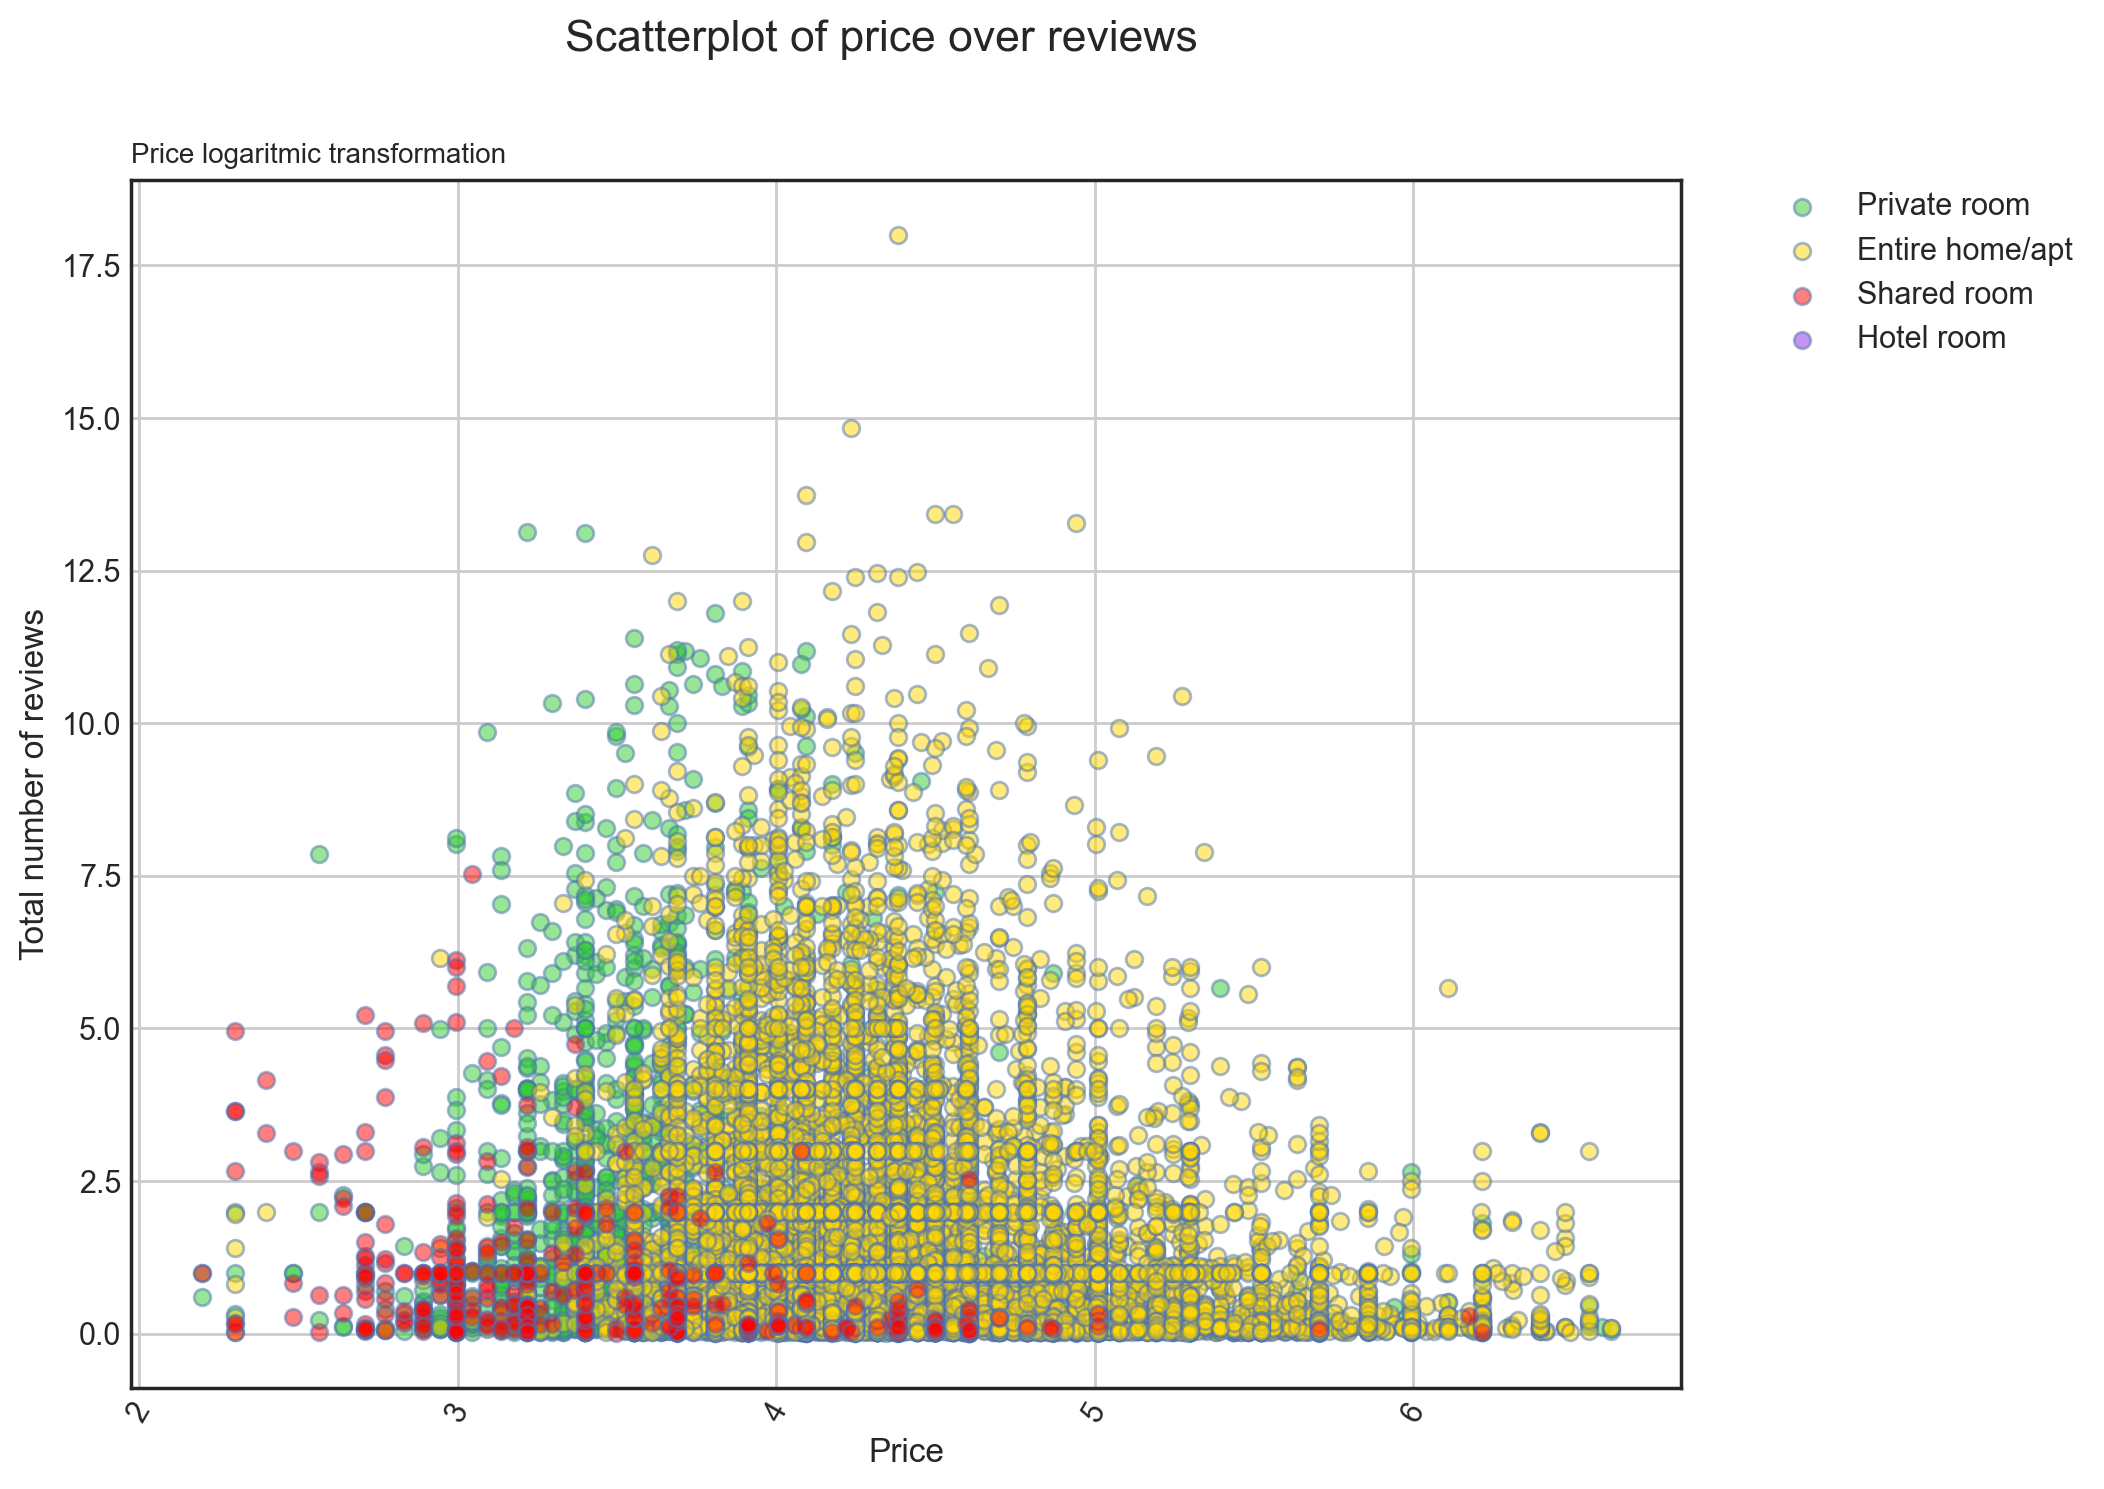

In [88]:
plt.style.use('seaborn-white')
plt.figure(figsize=(10,8), dpi = 200)

colors = {'Private room':'limegreen', 'Entire home/apt':'gold', 
                'Shared room':'red', 'Hotel room': 'blueviolet'}            

for tipo in list_room_price.modal_room_type.unique():
    x = list_room_price[list_room_price['room_type'] == tipo].modal_price.apply(np.log)
    y = list_room_price[list_room_price['room_type'] == tipo].reviews_per_month
    plt.scatter(x, y, c=colors[tipo], edgecolors='b', alpha=0.5)

plt.suptitle("Scatterplot of price over reviews", fontsize=16, horizontalalignment = 'center')

plt.title("Price logaritmic transformation", fontsize=10, loc = 'left')

plt.legend(list_room_price.modal_room_type.unique(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.ylabel('Total number of reviews')
plt.xlabel('Price')
plt.xticks(rotation=60)
plt.show()

#fig.savefig("price_log-scatter.png", dpi=300)

## Data Cleaning and Feature Engineering

Some interesting feature can be added to the data frame, in order to get the best fitting model while doing predictions.  
From literature, somee interesting variables are:
* distance from the city center;  
* number of nearby amenities;  
* ..

#### Distance from the city center CBD

In [89]:
geolocator = Nominatim(user_agent="myapplication")
address = 'Piazza del Duomo, 20122 Milano MI'
location = geolocator.geocode(address, timeout=30)
      
coords_duomo = (location.latitude, location.longitude)

geod = pyproj.Geod(ellps='WGS84')

In [90]:
list_room['CBD'] = ''

for i in range(len(list_room)):
    lat0, lon0 = location.latitude, location.longitude
    lat1, lon1 = list_room['latitude'][i], list_room['longitude'][i]
    
    azimuth1, azimuth2, distance = geod.inv(lon0, lat0, lon1, lat1)
    
    list_room['CBD'][i] = round((distance/1000), 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [91]:
list_room.head()

id                                name  host_id    host_name  \
0   6400                    The Studio Milan    13822    Francesca   
1  23986     " Characteristic Milanese flat"    95941       Jeremy   
2  28300             nice flat near the park   121663        Marta   
3  32119  Nico & Cynthia's Easy Yellow Suite   138683  Nico&Cinzia   
4  32649       Nico&Cinzia's Red Easy Suite!   138683  Nico&Cinzia   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   
3                  NaN   VIALE MONZA  45.519876   9.223101  Entire home/apt   
4                  NaN   VIALE MONZA  45.519422   9.226154  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     90               1                 11  2018-04-21               0.10   
1    150               1                 12  2018-04-22               0.15   
2    200               1                  8  2015-10-25               0.10   
3     70               3                 15  2018-07-01               0.14   
4     70               3                 28  2019-01-03               0.27   

   calculated_host_listings_count  availability_365 last_update  \
0                               1               358  2019-01-16   
1                               1               358  2019-01-16   
2                               1               365  2019-01-16   
3                               5               247  2019-01-16   
4                               5               316  2019-01-16   

   modal_room_type  modal_price  CBD  
0     Private room          100  2.7  
1  Entire home/apt          150    2  
2     Private room          200  2.2  
3  Entire home/apt           75  6.7  
4  Entire home/apt           70  6.7

In [92]:
#list_room.to_csv('listing_2019_tot.csv', index=False)

In [93]:
len(list_room), len(df_merged.id.unique())

(28255, 28255)

## POINTS OF INTERESTS

In [94]:
import folium
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [97]:
from openrouteservice import client

api_key = '5b3ce3597851110001cf624892490e9aaed54f719d8183bf82fee6ef'
clnt = client.Client(key=api_key) 
map1 = folium.Map(tiles='cartodbpositron', location=([location.latitude, location.longitude]), zoom_start=10)

In [98]:
# I create a dataset with pois
# data from https://theculturetrip.com/europe/italy/articles/20-must-visit-attractions-in-milan/

d1 = {"ID":1001373083,"type":["Museum"],"name":"Leonardo3, Milan",
      "post_status":"publish","domain":"attractions","lat":45.4665115,"lng":9.1897812}

d2 = {"ID":2015256,"type":["Historical Landmark"],"name":"Torre Branca, Milan",
      "post_status":"publish","domain":"attractions","lat":45.4732972,"lng":9.1729333}

d3 = {"ID":1001373100,"type":["Art Gallery"],"name":"Pinacoteca Ambrosiana",
 "post_status":"publish","domain":"attractions","lat":45.4634791,"lng":9.1857881}

d4 = {"ID":1979870,"type":["Building","Cathedral","Church"],"name":"Il Duomo",
      "post_status":"publish","domain":"attractions","lat":45.4640976,"lng":9.1919265}

d5 = {"ID":1979867,"type":["Historical Landmark"],"name":"Castello Sforzesco",
      "post_status":"publish","domain":"attractions","lat":45.4704762,"lng":9.1793325}

d6 = {"ID":1979868,"type":["Shopping Mall"],"name":"Galleria Vittorio Emanuele II",
       "post_status":"publish","domain":"attractions","lat":45.4658434,"lng":9.1899401}

d7 = {"ID":2053723,"type":["Opera House"],"name":"Teatro alla Scala",
      "post_status":"publish","domain":"attractions","lat":45.4674021,"lng":9.1895512}

d8 = {"ID":2014335,"type":["Church"],"name":"Santa Maria delle Grazie, Milan",
 "post_status":"publish","domain":"attractions","lat":45.465963,"lng":9.1709621}

d9 = {"ID":1001373088,"type":["Historical Landmark"],"name":"Navigli Neighbourhood",
      "post_status":"publish","domain":"attractions","lat":45.4477479,"lng":9.1696288}

d10 = {"ID":1979864,"type":["Art Gallery","Museum"],"name":"Museo del Novecento",
       "post_status":"publish","domain":"attractions","lat":45.4634871,"lng":9.1902915}

d11 = {"ID":1979871,"type":["Art Gallery","Architectural Landmark"],"name":"Pinacoteca di Brera, Milano",
       "post_status":"publish","domain":"attractions","lat":45.4719545,"lng":9.1878145}

d12 = {"ID":1979865,"type":["Park"],"name":"Parco Sempione, Milano",
       "post_status":"publish","domain":"attractions","lat":45.4720981,"lng":9.1772243}

d13 = {"ID":1979874,"type":["Church"],"name":"San Maurizio al Monastero Maggiore, Milan",
       "post_status":"publish","domain":"attractions","lat":45.4655747,"lng":9.1789404}

d14 = {"ID":1001373149,"type":["Cemetery"],"name":"Monumental Cemetery, Milan",
       "post_status":"publish","domain":"attractions","lat":45.4873357,"lng":9.1777588}

d15 = {"ID":1979863,"type":["Art Gallery","Cinema"],"name":"Fondazione Prada",
       "post_status":"publish","domain":"attractions","lat":45.4440639,"lng":9.2048171}

d16 = {"ID":1979873,"type":["Building"],"name":"Torre Velasca",
       "post_status":"publish","domain":"attractions","lat":45.4598961,"lng":9.1906166}

d17 = {"ID":1001373186,"type":["Historical Landmark"],"name":"Corso Como, Milan",
       "post_status":"publish","domain":"attractions","lat":45.4822154,"lng":9.185178317}

In [99]:
ds = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17]

d = {}
for k in d1.keys():
    d[k] = tuple(d[k] for d in ds)

In [100]:
pois = pd.DataFrame.from_dict(d)

In [101]:
pois.head(17)

ID                                   type  \
0   1001373083                               [Museum]   
1      2015256                  [Historical Landmark]   
2   1001373100                          [Art Gallery]   
3      1979870          [Building, Cathedral, Church]   
4      1979867                  [Historical Landmark]   
5      1979868                        [Shopping Mall]   
6      2053723                          [Opera House]   
7      2014335                               [Church]   
8   1001373088                  [Historical Landmark]   
9      1979864                  [Art Gallery, Museum]   
10     1979871  [Art Gallery, Architectural Landmark]   
11     1979865                                 [Park]   
12     1979874                               [Church]   
13  1001373149                             [Cemetery]   
14     1979863                  [Art Gallery, Cinema]   
15     1979873                             [Building]   
16  1001373186                  [Historical Landmark]   

                                         name post_status       domain  \
0                            Leonardo3, Milan     publish  attractions   
1                         Torre Branca, Milan     publish  attractions   
2                       Pinacoteca Ambrosiana     publish  attractions   
3                                    Il Duomo     publish  attractions   
4                          Castello Sforzesco     publish  attractions   
5               Galleria Vittorio Emanuele II     publish  attractions   
6                           Teatro alla Scala     publish  attractions   
7             Santa Maria delle Grazie, Milan     publish  attractions   
8                       Navigli Neighbourhood     publish  attractions   
9                         Museo del Novecento     publish  attractions   
10                Pinacoteca di Brera, Milano     publish  attractions   
11                     Parco Sempione, Milano     publish  attractions   
12  San Maurizio al Monastero Maggiore, Milan     publish  attractions   
13                 Monumental Cemetery, Milan     publish  attractions   
14                           Fondazione Prada     publish  attractions   
15                              Torre Velasca     publish  attractions   
16                          Corso Como, Milan     publish  attractions   

          lat       lng  
0   45.466512  9.189781  
1   45.473297  9.172933  
2   45.463479  9.185788  
3   45.464098  9.191926  
4   45.470476  9.179332  
5   45.465843  9.189940  
6   45.467402  9.189551  
7   45.465963  9.170962  
8   45.447748  9.169629  
9   45.463487  9.190292  
10  45.471955  9.187814  
11  45.472098  9.177224  
12  45.465575  9.178940  
13  45.487336  9.177759  
14  45.444064  9.204817  
15  45.459896  9.190617  
16  45.482215  9.185178

In [102]:
pois.icon = ['university', 'building', 'paint-brush', 'church', 'building', 'shopping-bag', 'university',
             'church', 'building', 'university', 'university', 'tree', 'church', 'cross', 
             'paint-brush', 'building', 'road']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
len(pois.icon)

17

In [104]:
pois['icon'] = pois.icon

In [105]:
for i in range(len(pois)):
    folium.map.Marker([pois['lat'][i], pois['lng'][i]],
                     icon=folium.Icon(color='lightgray', icon=pois['icon'][i], prefix='fa'),
                      popup=pois['name'][i]).add_to(map1)

In [106]:
map1

In [107]:
pois['point'] = list(zip(pois.lng, pois.lat))

In [108]:
pois['point'] = pois['point'].apply(lambda p: Point(p))

#### number of pois within 1 km AND average distance from all the 17 points of interest

In [109]:
list_room['number_pois'] = 0
list_room['avg_distance'] = 0

In [110]:
list_room.head(3)

id                             name  host_id  host_name  \
0   6400                 The Studio Milan    13822  Francesca   
1  23986  " Characteristic Milanese flat"    95941     Jeremy   
2  28300          nice flat near the park   121663      Marta   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   

   price  ...  last_review  reviews_per_month calculated_host_listings_count  \
0     90  ...   2018-04-21               0.10                              1   
1    150  ...   2018-04-22               0.15                              1   
2    200  ...   2015-10-25               0.10                              1   

   availability_365  last_update  modal_room_type modal_price  CBD  \
0               358   2019-01-16     Private room         100  2.7   
1               358   2019-01-16  Entire home/apt         150    2   
2               365   2019-01-16     Private room         200  2.2   

   number_pois avg_distance  
0            0            0  
1            0            0  
2            0            0  

[3 rows x 22 columns]

In [111]:
for j in range(len(pois)):
    for i in range(len(list_room)):
        lat0, lon0 = pois['lat'][j], pois['lng'][j]
        lat1, lon1 = list_room['latitude'][i], list_room['longitude'][i]
    
        azimuth1, azimuth2, distance = geod.inv(lon0, lat0, lon1, lat1)
        
        list_room['avg_distance'][i] += distance
    
        if distance <= 1000:
            list_room['number_pois'][i] += 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [112]:
list_room.head(3)

id                             name  host_id  host_name  \
0   6400                 The Studio Milan    13822  Francesca   
1  23986  " Characteristic Milanese flat"    95941     Jeremy   
2  28300          nice flat near the park   121663      Marta   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   

   price  ...  last_review  reviews_per_month calculated_host_listings_count  \
0     90  ...   2018-04-21               0.10                              1   
1    150  ...   2018-04-22               0.15                              1   
2    200  ...   2015-10-25               0.10                              1   

   availability_365  last_update  modal_room_type modal_price  CBD  \
0               358   2019-01-16     Private room         100  2.7   
1               358   2019-01-16  Entire home/apt         150    2   
2               365   2019-01-16     Private room         200  2.2   

   number_pois avg_distance  
0            1        50018  
1            1        37915  
2            3        30685  

[3 rows x 22 columns]

In [113]:
list_room['avg_distance'] = list_room['avg_distance'].apply(lambda x: round(((x/len(pois))/1000), 1))

In [114]:
list_room.head(3)

id                             name  host_id  host_name  \
0   6400                 The Studio Milan    13822  Francesca   
1  23986  " Characteristic Milanese flat"    95941     Jeremy   
2  28300          nice flat near the park   121663      Marta   

   neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0                  NaN       TIBALDI  45.441950   9.177974     Private room   
1                  NaN       NAVIGLI  45.449906   9.175971  Entire home/apt   
2                  NaN         SARPI  45.478141   9.172939     Private room   

   price  ...  last_review  reviews_per_month calculated_host_listings_count  \
0     90  ...   2018-04-21               0.10                              1   
1    150  ...   2018-04-22               0.15                              1   
2    200  ...   2015-10-25               0.10                              1   

   availability_365  last_update  modal_room_type modal_price  CBD  \
0               358   2019-01-16     Private room         100  2.7   
1               358   2019-01-16  Entire home/apt         150    2   
2               365   2019-01-16     Private room         200  2.2   

   number_pois avg_distance  
0            1          2.9  
1            1          2.2  
2            3          1.8  

[3 rows x 22 columns]

In [115]:
list_room.to_csv('list_room.csv')

In [155]:
list_room[list_room.number_pois.isin([0])]

id                                               name    host_id  \
3         32119                 Nico & Cynthia's Easy Yellow Suite     138683   
4         32649                      Nico&Cinzia's Red Easy Suite!     138683   
5         37256    COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER     119002   
6         40470                Giacinto Cosy & clean flat near MM1     174203   
7         42732                Navigli near down town, linked Expo     186608   
...         ...                                                ...        ...   
28250  40748756      Single bed #2 +WiFi in CENTRAL STATION Milano  316408145   
28251  40749095      Single bed #3 +WiFi in CENTRAL STATION Milano  316408145   
28252  40749412      Single bed #4 +WiFi in CENTRAL STATION Milano  316408145   
28253  40749826  Top room CENTRAL STATION MILANO 3 stop from DUOMO  316408145   
28254  40750447       2 Appartamenti per 3 camere e 2 Bagni Milano  139627704   

              host_name  neighbourhood_group neighbourhood   latitude  \
3           Nico&Cinzia                  NaN   VIALE MONZA  45.519876   
4           Nico&Cinzia                  NaN   VIALE MONZA  45.519422   
5             Giancarlo                  NaN     GUASTALLA  45.470736   
6              Giacinto                  NaN   VIALE MONZA  45.521110   
7             Francesco                  NaN      TICINESE  45.456636   
...                 ...                  ...           ...        ...   
28250             Marco                  NaN      CENTRALE  45.490706   
28251             Marco                  NaN      CENTRALE  45.490706   
28252             Marco                  NaN      CENTRALE  45.490706   
28253             Marco                  NaN      CENTRALE  45.490706   
28254  Giusy & Fabrizio                  NaN         GRECO  45.503960   

       longitude        room_type  price  ...  last_review  reviews_per_month  \
3       9.223101  Entire home/apt     70  ...   2018-07-01               0.14   
4       9.226154  Entire home/apt     70  ...   2019-01-03               0.27   
5       9.205777     Private room     55  ...   2018-04-22               0.29   
6       9.227273  Entire home/apt     88  ...   2017-07-24               0.37   
7       9.176615  Entire home/apt    199  ...   2018-04-22               0.34   
...          ...              ...    ...  ...          ...                ...   
28250   9.205667      Shared room     21  ...          NaN                NaN   
28251   9.205667      Shared room     21  ...          NaN                NaN   
28252   9.205667      Shared room     21  ...          NaN                NaN   
28253   9.205667     Private room     27  ...          NaN                NaN   
28254   9.205651  Entire home/apt    160  ...          NaN                NaN   

      calculated_host_listings_count  availability_365  last_update  \
3                                  5               247   2019-01-16   
4                                  5               316   2019-01-16   
5                                  2               357   2019-01-16   
6                                  2               296   2019-01-16   
7                                  2               365   2019-01-16   
...                              ...               ...          ...   
28250                              5               364   2019-12-11   
28251                              5               361   2019-12-11   
28252                              5               360   2019-12-11   
28253                              5               359   2019-12-11   
28254                              3               364   2019-12-11   

       modal_room_type modal_price  CBD  number_pois avg_distance  
3      Entire home/apt          75  6.7            0            7  
4      Entire home/apt          70  6.7            0            7  
5         Private room          55  1.3            0            2  
6      Entire home/apt          75  6.9            0            7

In [ ]:
###################### Isochrones ######################

As explained in Chapter 2.3.1, these methods do not work on such a big dataset.

In [ ]:
#### isochrones in osmnx

In [1]:
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import Polygon
import networkx as nx
import osmnx as ox
from pyproj import Proj, transform, Geod
ox.config(log_console=True, use_cache=True)

ModuleNotFoundError: No module named 'osmnx'

In [ ]:
def get_isochrone(loc, walk_time=10, speed=4.5):
    #loc = (lat, lon)
    G = ox.graph_from_point(loc, simplify=True, network_type='walk')
    gdf_nodes = ox.graph_to_gdfs(G, edges=False)
    x, y = gdf_nodes['geometry'].unary_union.centroid.xy
    center_node = ox.get_nearest_node(G, (y[0], x[0]))
    meters_per_minute = speed * 1000 / 60 #km per hour to m per minute
    for u, v, k, data in G.edges(data=True, keys=True):
        data['time'] = data['length'] / meters_per_minute
    subgraph = nx.ego_graph(G, center_node, radius=walk_time, distance='time')
    node_points = [Point(data['x'], data['y']) for node, data in subgraph.nodes(data=True)]
    polys = gpd.GeoSeries(node_points).unary_union.convex_hull
    return polys

In [ ]:
list_room['coord'] = list(zip(list_room.latitude, list_room.longitude))

In [ ]:
list_room['iso_5min'] = list_room['coord'].apply(lambda x: get_isochrone(x, walk_time=12, speed=4.5))

In [ ]:
list_room['count_iso'] = 0

In [ ]:
# count the number of pois for isochrone

for j in range(len(pois)):
    for i in range(len(list_room)):
        p = list_room['iso_5min'][i]
        if p.contains(pois['point'][j]):
            #print(str(pois['name'][j]) + ' is in ' + str(list_room_sub['id'][i]))
            list_room['count_iso'][i] += 1
            j += 1

In [ ]:
# print on the map (JUST FEW as example)

for i in range(len(list_room)):
    folium.GeoJson(list_room['iso_5min'][i]).add_to(map1)
    folium.map.Marker((list_room['coord'][i]), 
    icon=folium.Icon(color='gray', 
                     icon_color='#cc0000', 
                     icon='home', prefix='fa')).add_to(map1)

In [ ]:
#### isochrones in OPENROUTESERVICE

In [309]:

pois['point'] = pois['point'].apply(lambda p: Point(p))

In [310]:
# point of interest of the city
pois.head()

ID                           type                   name  \
0  1001373083                       [Museum]       Leonardo3, Milan   
1     2015256          [Historical Landmark]    Torre Branca, Milan   
2  1001373100                  [Art Gallery]  Pinacoteca Ambrosiana   
3     1979870  [Building, Cathedral, Church]               Il Duomo   
4     1979867          [Historical Landmark]     Castello Sforzesco   

  post_status       domain        lat       lng  \
0     publish  attractions  45.466512  9.189781   
1     publish  attractions  45.473297  9.172933   
2     publish  attractions  45.463479  9.185788   
3     publish  attractions  45.464098  9.191926   
4     publish  attractions  45.470476  9.179332   

                                  point  
0  POINT (9.189781200000001 45.4665115)  
1          POINT (9.1729333 45.4732972)  
2          POINT (9.1857881 45.4634791)  
3  POINT (9.191926499999999 45.4640976)  
4  POINT (9.179332499999999 45.4704762)

In [381]:
coords_duomo

(45.4637018, 9.1926368)

In [311]:
# set up a disctionary with coords

In [312]:
from geojson import Feature, Point, FeatureCollection, dump

listing_dict = {}

for index, row in list_room.iterrows():
    listing_dict[row.id] = {'location': [row.longitude, row.latitude]}

In [318]:
#listing_dict

In [313]:
########################## trials with first 5 listings ##########################

list_room_subset = list_room.iloc[1:6, ]

In [314]:
subset_dict = {}

for index, row in list_room_subset.iterrows():
    subset_dict[row.id] = {'location': [row.longitude, row.latitude]}

In [259]:
subset_dict

{23986: {'location': [9.175971419960105, 45.44990618158722]},
 28300: {'location': [9.172938848391016, 45.47814064152113]},
 32119: {'location': [9.223101017889768, 45.51987558987919]},
 32649: {'location': [9.226153657231457, 45.51942226469996]},
 37256: {'location': [9.205777188546783, 45.47073597616929]}}

In [ ]:
##################################################################################

In [383]:
params_iso = {'profile': 'foot-walking',
              'intervals': [600], # 600/60 = 10 mins
              'segments': 600
             }

for listing, coord in subset_dict.items():
    params_iso['locations'] = [coord['location']] # Add apartment coords to request parameters
    coord['iso'] = clnt.isochrones(**params_iso) # Perform isochrone request
    folium.features.GeoJson(coord['iso']).add_to(map1) # Add GeoJson to map
    
    folium.map.Marker(list(reversed(coord['location'])), # reverse coords due to weird folium lat/lon syntax
                      icon=folium.Icon(color='lightgray',
                                        icon_color='#cc0000',
                                        icon='home',
                                        prefix='fa',
                                       ),
                      popup=listing,
                 ).add_to(map1) # Add apartment locations to map

map1

In [301]:
from geojson import Point, Feature, FeatureCollection, dump

#s = subset_dict[23986]['iso']['features'][0]['geometry']
#key = 23986

features = []

for key in subset_dict:
    g = subset_dict[23986]['iso']['features'][0]['geometry']
    
    features.append(Feature(geometry=g, properties={"id": key}))


feature_collection = FeatureCollection(features)

#with open('myfile.geojson', 'w') as f:
#    dump(feature_collection, f)

In [321]:
polygon = gpd.GeoDataFrame.from_features(feature_collection['features'])

In [338]:
polygon.head()

geometry     id  count
0  POLYGON ((9.16618 45.44796, 9.16633 45.44727, ...  23986      1
1  POLYGON ((9.16618 45.44796, 9.16633 45.44727, ...  28300      0
2  POLYGON ((9.16618 45.44796, 9.16633 45.44727, ...  32119      0
3  POLYGON ((9.16618 45.44796, 9.16633 45.44727, ...  32649      0
4  POLYGON ((9.16618 45.44796, 9.16633 45.44727, ...  37256      0

In [320]:
pois.head()

ID                           type                   name  \
0  1001373083                       [Museum]       Leonardo3, Milan   
1     2015256          [Historical Landmark]    Torre Branca, Milan   
2  1001373100                  [Art Gallery]  Pinacoteca Ambrosiana   
3     1979870  [Building, Cathedral, Church]               Il Duomo   
4     1979867          [Historical Landmark]     Castello Sforzesco   

  post_status       domain        lat       lng  \
0     publish  attractions  45.466512  9.189781   
1     publish  attractions  45.473297  9.172933   
2     publish  attractions  45.463479  9.185788   
3     publish  attractions  45.464098  9.191926   
4     publish  attractions  45.470476  9.179332   

                                  point  
0  POINT (9.189781200000001 45.4665115)  
1          POINT (9.1729333 45.4732972)  
2          POINT (9.1857881 45.4634791)  
3  POINT (9.191926499999999 45.4640976)  
4  POINT (9.179332499999999 45.4704762)

In [337]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

polygon['count'] = 0

for j in range(len(pois)):
    for i in range(len(polygon)):
        p = polygon['geometry'][i]
        if p.contains(pois['point'][j]):
            print(str(pois['name'][j]) + ' is in ' + str(polygon['id'][i]))
            polygon['count'][i] += 1
            j += 1
    

Navigli Neighbourhood is in 23986


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
##############################################################################

## CALENDAR

In [163]:
#import calendar data
cal_jan = pd.read_csv('milano_2019/calendar.csv') 
cal_feb = pd.read_csv('milano_2019/calendar-2.csv')
cal_mar = pd.read_csv('milano_2019/calendar-3.csv')
cal_apr = pd.read_csv('milano_2019/calendar-4.csv')
cal_may = pd.read_csv('milano_2019/calendar-6.csv')
cal_jun = pd.read_csv('milano_2019/calendar-5.csv')
cal_jul = pd.read_csv('milano_2019/calendar-7.csv')
cal_aug = pd.read_csv('milano_2019/calendar-9.csv')
cal_sep = pd.read_csv('milano_2019/calendar-12.csv')
cal_oct = pd.read_csv('milano_2019/calendar-8.csv')
cal_nov = pd.read_csv('milano_2019/calendar-10.csv')
cal_dec = pd.read_csv('milano_2019/calendar-11.csv')